In [1]:
import requests
import zipfile 
import pandas as pd
import numpy as np
import json 
from pprint import pprint
import hashlib
import datetime
import re

In [2]:

url = "https://datos.madrid.es/egob/catalogo/300584-2083621-rrhh_efectivos.{responseContentType}"

response = requests.get(url)

if response.status_code == 200:
    response.json()
    
else:
    print("Error al hacer la solicitud:", response.status_code)


response_json = json.loads(response.text)

df = pd.DataFrame(response_json["records"])
df.head()


response_json


{'page': 1,
 'pageSize': 100,
 'totalRecords': 147814,
 'pageRecords': 100,
 'status': 200,
 'responseDate': '2023-07-25T11:25:44',
 'first': 'https://ciudadesabiertas.madrid.es/dynamicAPI/API/query/rrhh_efectivos.json?pageSize=100&page=1',
 'last': 'https://ciudadesabiertas.madrid.es/dynamicAPI/API/query/rrhh_efectivos.json?pageSize=100&page=1479',
 'next': 'https://ciudadesabiertas.madrid.es/dynamicAPI/API/query/rrhh_efectivos.json?pageSize=100&page=2',
 'self': 'https://ciudadesabiertas.madrid.es/dynamicAPI/API/query/rrhh_efectivos.json?pageSize=100&page=1',
 'contentMD5': '8465e404bf0018b12df26fa1353daf18',
 'records': [{'SECUENCIA': 1,
   'COD_AREA': '10000002',
   'DENOMINACION_AREA': 'DISTRITO DE CENTRO                                                              ',
   'COD_ORGANO_DIRECTIVO': ' ',
   'DENOMINACION_ORGANO_DIRECTIVO': '',
   'COD_GRUPO_PERSONAL': 'F',
   'DESC__GRUPO_PERSONAL': 'Funcionario',
   'COD_GRUPO_TITULACION': 'C2',
   'DESC_GRUPO_TITULACION': 'Graduado E

In [4]:
url = "https://datos.madrid.es/egob/catalogo/300584-2083621-rrhh_efectivos.{responseContentType}?"

dataframe = []

for pagina in range(1,1480):
    response = requests.get(url + "page=" + str(pagina))
    response_json = json.loads(response.text)

    df = pd.DataFrame(response_json["records"])
    dataframe.append(df)

final_df = pd.concat(dataframe, ignore_index=True)

print(final_df)

        SECUENCIA  COD_AREA  \
0               1  10000002   
1               2  10000002   
2               3  10000002   
3               4  10000002   
4               5  10000002   
...           ...       ...   
147809       9924  10219710   
147810       9925  10219710   
147811       9926  10219710   
147812       9927  10219710   
147813       9928  10219710   

                                        DENOMINACION_AREA  \
0       DISTRITO DE CENTRO                            ...   
1       DISTRITO DE CENTRO                            ...   
2       DISTRITO DE CENTRO                            ...   
3       DISTRITO DE CENTRO                            ...   
4       DISTRITO DE CENTRO                            ...   
...                                                   ...   
147809  Área de Gobierno de Obras y Equipamientos     ...   
147810  Área de Gobierno de Obras y Equipamientos     ...   
147811  Área de Gobierno de Obras y Equipamientos     ...   
147812  Área de G

In [5]:
final_df.to_csv("Funcionarios_1.csv")

In [6]:
data1 = pd.read_csv("Funcionarios_1.csv")
data1

Unnamed: 0  SECUENCIA  COD_AREA  \
0                0          1  10000002   
1                1          2  10000002   
2                2          3  10000002   
3                3          4  10000002   
4                4          5  10000002   
...            ...        ...       ...   
147809      147809       9924  10219710   
147810      147810       9925  10219710   
147811      147811       9926  10219710   
147812      147812       9927  10219710   
147813      147813       9928  10219710   

                                        DENOMINACION_AREA  \
0       DISTRITO DE CENTRO                            ...   
1       DISTRITO DE CENTRO                            ...   
2       DISTRITO DE CENTRO                            ...   
3       DISTRITO DE CENTRO                            ...   
4       DISTRITO DE CENTRO                            ...   
...                                                   ...   
147809  Área de Gobierno de Obras y Equipamientos     ...   
147810  Área de Gobierno de Obras y Equipamientos     ...   
147811  Área de Gobierno de Obras y Equipamientos     ...   
147812  Área de Gobierno de Obras y Equipamientos     ...   
147813  Área de Gobierno de Obras y Equipamientos     ...   

       COD_ORGANO_DIRECTIVO  \
0                             
1                  10006943   
2                  10006943   
3                  10006943   
4                  10006943   
...                     ...   
147809             10220326   
147810             10220326   
147811             10220326   
147812             10220326   
147813             10222987   

                            DENOMINACION_ORGANO_DIRECTIVO COD_GRUPO_PERSONAL  \
0                                                     NaN                  F   
1       COORDINACION DEL DISTRITO DE CENTRO           ...                  F   
2       COORDINACION DEL DISTRITO DE CENTRO           ...                  F   
3       COORDINACION DEL DISTRITO DE CENTRO           ...                  F   
4       COORDINACION DEL DISTRITO DE CENTRO           ...                  F   
...                                                   ...                ...   
147809  Dirección General de Arquitectura y Conservaci...                  I   
147810  Dirección General de Arquitectura y Conservaci...                  I   
147811  Dirección General de Arquitectura y Conservaci...                  I   
147812  Dirección General de Arquitectura y Conservaci...                  R   
147813  Dirección General de Accesibilidad            ...                  F   

        DESC__GRUPO_PERSONAL COD_GRUPO_TITULACION  \
0                Funcionario                   C2   
1                Funcionario                   A1   
2                Funcionario                   A1   
3                Funcionario                   A1   
4                Funcionario                   A2   
...                      ...                  ...   
147809  Funcionario Interino                   A2   
147810  Funcionario Interino                   A2   
147811  Funcionario Interino                   A2   
147812            Directivos                    X   
147813           Funcionario                   C2   

                                    DESC_GRUPO_TITULACION COD_CATEGORIA  \
0                       Graduado Escolar,F.P. de 1º grado          D005   
1       Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...          A002   
2       Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...          A635   
3       Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...          A635   
4       Ing.Técnico,Diplomado Universitario,Arquitecto...          B015   
...                                                   ...           ...   
147809  Ing.Técnico,Diplomado Universitario,Arquitecto...          B030   
147810  Ing.Técnico,Diplomado Universitario,Arquitecto...          B030   
147811  Ing.Técnico,Diplomado Universitario,Arquitecto...          B030   
147812                            Sin

In [636]:
#Esto es para revisar la información del df sobre columnas, índices e información general del df

data1.columns

Index(['Unnamed: 0', 'SECUENCIA', 'COD_AREA', 'DENOMINACION_AREA',
       'COD_ORGANO_DIRECTIVO', 'DENOMINACION_ORGANO_DIRECTIVO',
       'COD_GRUPO_PERSONAL', 'DESC__GRUPO_PERSONAL', 'COD_GRUPO_TITULACION',
       'DESC_GRUPO_TITULACION', 'COD_CATEGORIA', 'DESC_CATEGORIA', 'DESC_SEXO',
       'RANGO_EDAD', 'TOTAL_PERSONAS', 'MES_DATOS', 'ANIO_DATOS', 'FX_CARGA',
       'FX_DATOS_INI', 'FX_DATOS_FIN'],
      dtype='object')

In [7]:
data1.index

RangeIndex(start=0, stop=147814, step=1)

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147814 entries, 0 to 147813
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Unnamed: 0                     147814 non-null  int64 
 1   SECUENCIA                      147814 non-null  int64 
 2   COD_AREA                       147814 non-null  int64 
 3   DENOMINACION_AREA              147814 non-null  object
 4   COD_ORGANO_DIRECTIVO           147814 non-null  object
 5   DENOMINACION_ORGANO_DIRECTIVO  141909 non-null  object
 6   COD_GRUPO_PERSONAL             147814 non-null  object
 7   DESC__GRUPO_PERSONAL           147814 non-null  object
 8   COD_GRUPO_TITULACION           147814 non-null  object
 9   DESC_GRUPO_TITULACION          147814 non-null  object
 10  COD_CATEGORIA                  147814 non-null  object
 11  DESC_CATEGORIA                 147814 non-null  object
 12  DESC_SEXO                      147814 non-nu

In [9]:
#cambio los nombres de las columnas a minúsculas

columnas = data1.columns.tolist()
columnas_en_minusculas = [col.lower() for col in columnas]
data1.columns = columnas_en_minusculas

print(data1)

        unnamed: 0  secuencia  cod_area  \
0                0          1  10000002   
1                1          2  10000002   
2                2          3  10000002   
3                3          4  10000002   
4                4          5  10000002   
...            ...        ...       ...   
147809      147809       9924  10219710   
147810      147810       9925  10219710   
147811      147811       9926  10219710   
147812      147812       9927  10219710   
147813      147813       9928  10219710   

                                        denominacion_area  \
0       DISTRITO DE CENTRO                            ...   
1       DISTRITO DE CENTRO                            ...   
2       DISTRITO DE CENTRO                            ...   
3       DISTRITO DE CENTRO                            ...   
4       DISTRITO DE CENTRO                            ...   
...                                                   ...   
147809  Área de Gobierno de Obras y Equipamientos     ..

In [10]:
#compruebo que las columnas están cambiadas correctamente

data1.columns

Index(['unnamed: 0', 'secuencia', 'cod_area', 'denominacion_area',
       'cod_organo_directivo', 'denominacion_organo_directivo',
       'cod_grupo_personal', 'desc__grupo_personal', 'cod_grupo_titulacion',
       'desc_grupo_titulacion', 'cod_categoria', 'desc_categoria', 'desc_sexo',
       'rango_edad', 'total_personas', 'mes_datos', 'anio_datos', 'fx_carga',
       'fx_datos_ini', 'fx_datos_fin'],
      dtype='object')

In [11]:
data1.shape

(147814, 20)

In [12]:
#elimino columnas que no nos interesan

del data1["unnamed: 0"]
del data1['cod_area']
del data1['cod_organo_directivo']
del data1['cod_categoria']
del data1['fx_carga']
del data1['fx_datos_ini']
del data1['fx_datos_fin']

In [13]:
#compruebo que las columnas están eliminadas 
data1.shape

(147814, 13)

In [14]:
#Lo saco para obtener información de las columnas

data1.columns
for column in data1.columns:
    print(data1[column].describe())
    print("------------------")

count    147814.000000
mean       4928.052323
std        2845.413529
min           1.000000
25%        2464.000000
50%        4928.000000
75%        7391.000000
max        9956.000000
Name: secuencia, dtype: float64
------------------
count                                                147814
unique                                                   78
top       Área de Gobierno de Medio Ambiente y Movilidad...
freq                                                   8819
Name: denominacion_area, dtype: object
------------------
count                                                141909
unique                                                  193
top       Gerencia de Madrid Salud                      ...
freq                                                   4341
Name: denominacion_organo_directivo, dtype: object
------------------
count     147814
unique         7
top            F
freq       74181
Name: cod_grupo_personal, dtype: object
------------------
count          147814
unique  

In [15]:
#compruebo que en la columna des_grupo_personal el valor Laboral indefinido, viene dado con i mayúscula y minúscula

data1.loc[data1['desc__grupo_personal'] == 'Laboral indefinido', :]

secuencia                                  denominacion_area  \
165           166  DISTRITO DE ARGANZUELA                        ...   
215           216  DISTRITO DE ARGANZUELA                        ...   
320           321  DISTRITO DE ARGANZUELA                        ...   
321           322  DISTRITO DE ARGANZUELA                        ...   
433           434  DISTRITO DE RETIRO                            ...   
...           ...                                                ...   
147628       9743  Área de Gobierno de Obras y Equipamientos     ...   
147629       9744  Área de Gobierno de Obras y Equipamientos     ...   
147630       9745  Área de Gobierno de Obras y Equipamientos     ...   
147642       9757  Área de Gobierno de Obras y Equipamientos     ...   
147661       9776  Área de Gobierno de Obras y Equipamientos     ...   

                            denominacion_organo_directivo cod_grupo_personal  \
165     COORDINACION DEL DISTRITO DE ARGANZUELA       ...                  D   
215     COORDINACION DEL DISTRITO DE ARGANZUELA       ...                  D   
320     COORDINACION DEL DISTRITO DE ARGANZUELA       ...                  D   
321     COORDINACION DEL DISTRITO DE ARGANZUELA       ...                  D   
433     COORDINACION DEL DISTRITO DE RETIRO           ...                  D   
...                                                   ...                ...   
147628  Dirección General de Conservación de Vías Públ...                  D   
147629  Dirección General de Conservación de Vías Públ...                  D   
147630  Dirección General de Conservación de Vías Públ...                  D   
147642  Dirección General de Conservación de Vías Públ...                  D   
147661  Dirección General de Conservación de Vías Públ...                  D   

       desc__grupo_personal cod_grupo_titulacion  \
165      Laboral indefinido                   C1   
215      Laboral indefinido                    E   
320      Laboral indefinido                   C1   
321      Laboral indefinido                   C1   
433      Laboral indefinido                   C1   
...                     ...                  ...   
147628   Laboral indefinido                   C1   
147629   Laboral indefinido                   C1   
147630   Laboral indefinido                   C2   
147642   Laboral indefinido                   C1   
147661   Laboral indefinido                   C2   

                    desc_grupo_titulacion              desc_categoria  \
165     Bachillerato,B.U.P.,F.P. 2º grado           MONITOR DEPORTIVO   
215            Certificado de Escolaridad                  OPERARIO 1   
320     Bachillerato,B.U.P.,F.P. 2º grado           MONITOR DEPORTIVO   
321     Bachillerato,B.U.P.,F.P. 2º grado           MONITOR DEPORTIVO   
433     Bachillerato,B.U.P.,F.P. 2º grado    MONITOR DEPORTIVO S.O.S.   
...                                   ...                         ...   
147628  Bachillerato,B.U.P.,F.P. 2º grado            ADMINISTRATIVO 2   
147629  Bachillerato,B.U.P.,F.P. 2º grado  TECNICO DE MANTENIMIENTO 2   
147630  Graduado Escolar,F.P. de 1º grado   AUXILIAR ADMINISTRATIVO 3   
147642  Bachillerato,B.U.P.,F.P. 2º grado  TECNICO DE MANTENIMIENTO 2   
147661  Graduado Escolar,F.P. de 1º grado   AUXILIAR ADMINISTRATIVO 3   

       desc_sexo rango_edad  total_personas  mes_datos  anio_datos  
165            H    45 - 49               1          4        2022  
215            H    50 - 54               1          4        2022  
320            M    40 - 44               2          4        2022  
321            M    45 - 49               1          4        2022  
433            M    40 - 44               1          4        2022  
...          ...        ...             ...        ...         ...  
147628         M    65 - 69               1          4        2023  
147629         H    45 - 49               2          4        2023  
147630         M    45 - 49               1          4     

In [16]:
#con el siguiente código queda resuelta la variación de las mayúsculas y minúsculas

valor_buscado = 'Laboral indefinido'
valor_reemplazo = 'Laboral Indefinido'

data1.loc[data1['desc__grupo_personal'] == valor_buscado, 'desc__grupo_personal'] = data1.loc[data1['desc__grupo_personal'] == valor_buscado, 'desc__grupo_personal'].str.replace('i', 'I', 1)
data1

secuencia                                  denominacion_area  \
0               1  DISTRITO DE CENTRO                            ...   
1               2  DISTRITO DE CENTRO                            ...   
2               3  DISTRITO DE CENTRO                            ...   
3               4  DISTRITO DE CENTRO                            ...   
4               5  DISTRITO DE CENTRO                            ...   
...           ...                                                ...   
147809       9924  Área de Gobierno de Obras y Equipamientos     ...   
147810       9925  Área de Gobierno de Obras y Equipamientos     ...   
147811       9926  Área de Gobierno de Obras y Equipamientos     ...   
147812       9927  Área de Gobierno de Obras y Equipamientos     ...   
147813       9928  Área de Gobierno de Obras y Equipamientos     ...   

                            denominacion_organo_directivo cod_grupo_personal  \
0                                                     NaN                  F   
1       COORDINACION DEL DISTRITO DE CENTRO           ...                  F   
2       COORDINACION DEL DISTRITO DE CENTRO           ...                  F   
3       COORDINACION DEL DISTRITO DE CENTRO           ...                  F   
4       COORDINACION DEL DISTRITO DE CENTRO           ...                  F   
...                                                   ...                ...   
147809  Dirección General de Arquitectura y Conservaci...                  I   
147810  Dirección General de Arquitectura y Conservaci...                  I   
147811  Dirección General de Arquitectura y Conservaci...                  I   
147812  Dirección General de Arquitectura y Conservaci...                  R   
147813  Dirección General de Accesibilidad            ...                  F   

        desc__grupo_personal cod_grupo_titulacion  \
0                Funcionario                   C2   
1                Funcionario                   A1   
2                Funcionario                   A1   
3                Funcionario                   A1   
4                Funcionario                   A2   
...                      ...                  ...   
147809  Funcionario Interino                   A2   
147810  Funcionario Interino                   A2   
147811  Funcionario Interino                   A2   
147812            Directivos                    X   
147813           Funcionario                   C2   

                                    desc_grupo_titulacion  \
0                       Graduado Escolar,F.P. de 1º grado   
1       Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
2       Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
3       Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
4       Ing.Técnico,Diplomado Universitario,Arquitecto...   
...                                                   ...   
147809  Ing.Técnico,Diplomado Universitario,Arquitecto...   
147810  Ing.Técnico,Diplomado Universitario,Arquitecto...   
147811  Ing.Técnico,Diplomado Universitario,Arquitecto...   
147812                            Sin grupo de titulación   
147813                  Graduado Escolar,F.P. de 1º grado   

                                           desc_categoria desc_sexo  \
0       AUXILIAR ADMINISTRATIVO                       ...         M   
1       GRUPO A1 OTRAS ADMINISTRACIONES               ...         M   
2       TECNICO SUPERIOR                              ...         M   
3       TECNICO SUPERIOR                              ...         M   
4       DIPLOMADO EN TRABAJOS SOCIALES                ...         M   
...                                                   ...       ...   
147809  ARQUITECTO TECNICO                            ...         M   
147810  ARQUITECTO TECNICO                            ...         H   
147811  ARQUITECTO TECNICO                            ...         H   
147812  ORGANO DIRECTIVO                              ...         M   
147813  AUXILIAR ADMINISTRATIVO

In [17]:
#compruebo que ya no hay variación:
data1.loc[data1['desc__grupo_personal'] == 'Laboral Indefinido', :]

secuencia                                  denominacion_area  \
165           166  DISTRITO DE ARGANZUELA                        ...   
215           216  DISTRITO DE ARGANZUELA                        ...   
320           321  DISTRITO DE ARGANZUELA                        ...   
321           322  DISTRITO DE ARGANZUELA                        ...   
433           434  DISTRITO DE RETIRO                            ...   
...           ...                                                ...   
147628       9743  Área de Gobierno de Obras y Equipamientos     ...   
147629       9744  Área de Gobierno de Obras y Equipamientos     ...   
147630       9745  Área de Gobierno de Obras y Equipamientos     ...   
147642       9757  Área de Gobierno de Obras y Equipamientos     ...   
147661       9776  Área de Gobierno de Obras y Equipamientos     ...   

                            denominacion_organo_directivo cod_grupo_personal  \
165     COORDINACION DEL DISTRITO DE ARGANZUELA       ...                  D   
215     COORDINACION DEL DISTRITO DE ARGANZUELA       ...                  D   
320     COORDINACION DEL DISTRITO DE ARGANZUELA       ...                  D   
321     COORDINACION DEL DISTRITO DE ARGANZUELA       ...                  D   
433     COORDINACION DEL DISTRITO DE RETIRO           ...                  D   
...                                                   ...                ...   
147628  Dirección General de Conservación de Vías Públ...                  D   
147629  Dirección General de Conservación de Vías Públ...                  D   
147630  Dirección General de Conservación de Vías Públ...                  D   
147642  Dirección General de Conservación de Vías Públ...                  D   
147661  Dirección General de Conservación de Vías Públ...                  D   

       desc__grupo_personal cod_grupo_titulacion  \
165      Laboral Indefinido                   C1   
215      Laboral Indefinido                    E   
320      Laboral Indefinido                   C1   
321      Laboral Indefinido                   C1   
433      Laboral Indefinido                   C1   
...                     ...                  ...   
147628   Laboral Indefinido                   C1   
147629   Laboral Indefinido                   C1   
147630   Laboral Indefinido                   C2   
147642   Laboral Indefinido                   C1   
147661   Laboral Indefinido                   C2   

                    desc_grupo_titulacion              desc_categoria  \
165     Bachillerato,B.U.P.,F.P. 2º grado           MONITOR DEPORTIVO   
215            Certificado de Escolaridad                  OPERARIO 1   
320     Bachillerato,B.U.P.,F.P. 2º grado           MONITOR DEPORTIVO   
321     Bachillerato,B.U.P.,F.P. 2º grado           MONITOR DEPORTIVO   
433     Bachillerato,B.U.P.,F.P. 2º grado    MONITOR DEPORTIVO S.O.S.   
...                                   ...                         ...   
147628  Bachillerato,B.U.P.,F.P. 2º grado            ADMINISTRATIVO 2   
147629  Bachillerato,B.U.P.,F.P. 2º grado  TECNICO DE MANTENIMIENTO 2   
147630  Graduado Escolar,F.P. de 1º grado   AUXILIAR ADMINISTRATIVO 3   
147642  Bachillerato,B.U.P.,F.P. 2º grado  TECNICO DE MANTENIMIENTO 2   
147661  Graduado Escolar,F.P. de 1º grado   AUXILIAR ADMINISTRATIVO 3   

       desc_sexo rango_edad  total_personas  mes_datos  anio_datos  
165            H    45 - 49               1          4        2022  
215            H    50 - 54               1          4        2022  
320            M    40 - 44               2          4        2022  
321            M    45 - 49               1          4        2022  
433            M    40 - 44               1          4        2022  
...          ...        ...             ...        ...         ...  
147628         M    65 - 69               1          4        2023  
147629         H    45 - 49               2          4        2023  
147630         M    45 - 49               1          4     

In [18]:
# compruebo que la edad viene dada en un rango de 4 años, para poder obtener información, voy a sacar la media de este rango
# realizo  la siguiente función para convertir el rango en un valor medio
def calcular_valor_medio(rango):
    valores = re.findall(r'\d+', rango) 
    if len(valores) >= 2:
        rango_inferior = int(valores[0])
        rango_superior = int(valores[1])
        return (rango_inferior + rango_superior) / 2
    else:
        return None  

data1["edad_media"] = data1["rango_edad"].apply(calcular_valor_medio)
data1.edad_media

0         42.0
1         52.0
2         42.0
3         52.0
4         47.0
          ... 
147809    47.0
147810    42.0
147811    52.0
147812    67.0
147813    37.0
Name: edad_media, Length: 147814, dtype: float64

In [19]:
#Con el min y el max compruebo que solo están dos años: 2022 y 2023
data1.anio_datos.min()
data1.anio_datos.max()
data1.isnull() #para comprobar que no hay valores nulos
#timesData['year'].unique() para ver valores único sdentro de la columna

secuencia  denominacion_area  denominacion_organo_directivo  \
0           False              False                           True   
1           False              False                          False   
2           False              False                          False   
3           False              False                          False   
4           False              False                          False   
...           ...                ...                            ...   
147809      False              False                          False   
147810      False              False                          False   
147811      False              False                          False   
147812      False              False                          False   
147813      False              False                          False   

        cod_grupo_personal  desc__grupo_personal  cod_grupo_titulacion  \
0                    False                 False                 False   
1                    False                 False                 False   
2                    False                 False                 False   
3                    False                 False                 False   
4                    False                 False                 False   
...                    ...                   ...                   ...   
147809               False                 False                 False   
147810               False                 False                 False   
147811               False                 False                 False   
147812               False                 False                 False   
147813               False                 False                 False   

        desc_grupo_titulacion  desc_categoria  desc_sexo  rango_edad  \
0                       False           False      False       False   
1                       False           False      False       False   
2                       False           False      False       False   
3                       False           False      False       False   
4                       False           False      False       False   
...                       ...             ...        ...         ...   
147809                  False           False      False       False   
147810                  False           False      False       False   
147811                  False           False      False       False   
147812                  False           False      False       False   
147813                  False           False      False       False   

        total_personas  mes_datos  anio_datos  edad_media  
0                False      False       False       False  
1                False      False       False       False  
2                False      False       False       False  
3                False      False       False       False  
4                False      False       False       False  
...                ...        ...         ...         ...  
147809           False      False       False       False  
147810           False      False       False       False  
147811           False      False       False       False  
147812           False      False       False       False  
147813           False      False       False       False  

[147814 rows x 14 columns]

In [20]:
#Me voy a quedar solo con los datos del 2023 al ser más actuales y porque en el año 2022 no están todos los meses y notengo la tabla de retribuciones del 2022

data1.groupby(['anio_datos','mes_datos']).describe().total_personas

count      mean        std  min  25%  50%  75%     max
anio_datos mes_datos                                                         
2022       4          9652.0  2.891629  19.619647  1.0  1.0  1.0  2.0  1014.0
           5          9714.0  2.866996  19.269727  1.0  1.0  1.0  2.0   998.0
           6          9755.0  2.862225  19.205633  1.0  1.0  1.0  2.0   996.0
           7          9785.0  2.853858  19.162443  1.0  1.0  1.0  2.0   994.0
           8          9798.0  2.852725  19.132504  1.0  1.0  1.0  2.0   994.0
           9          9841.0  2.841175  19.067346  1.0  1.0  1.0  2.0   994.0
           10         9878.0  2.819599  19.013577  1.0  1.0  1.0  2.0   994.0
           11         9908.0  2.812677  19.000365  1.0  1.0  1.0  2.0   994.0
           12         9951.0  2.803035  18.691325  1.0  1.0  1.0  2.0  1013.0
2023       1          9934.0  2.797866  18.701414  1.0  1.0  1.0  2.0  1014.0
           2          9887.0  2.807930  18.954939  1.0  1.0  1.0  2.0  1035.0
           3          9880.0  2.810931  18.950030  1.0  1.0  1.0  2.0  1035.0
           4          9928.0  2.830379  19.599810  1.0  1.0  1.0  2.0  1098.0
           5          9956.0  2.831258  19.148589  1.0  1.0  1.0  2.0  1070.0
           6          9947.0  2.832010  19.147465  1.0  1.0  1.0  2.0  1071.0

In [21]:
#creo un nuevo dataframe para el año 2023 y poder trabajar solo con este año
data2023 = data1.loc[data1['anio_datos'] == 2023, :]
data2023.head()

secuencia                                  denominacion_area  \
78331          1  Distrito de Centro                            ...   
78332          2  Distrito de Centro                            ...   
78333          3  Distrito de Centro                            ...   
78334          4  Distrito de Centro                            ...   
78335          5  Distrito de Centro                            ...   

                           denominacion_organo_directivo cod_grupo_personal  \
78331                                                NaN                  F   
78332                                                NaN                  F   
78333  Coordinación del Distrito de Centro           ...                  F   
78334  Coordinación del Distrito de Centro           ...                  F   
78335  Coordinación del Distrito de Centro           ...                  F   

      desc__grupo_personal cod_grupo_titulacion  \
78331          Funcionario                   C2   
78332          Funcionario                   C2   
78333          Funcionario                   A1   
78334          Funcionario                   A1   
78335          Funcionario                   A1   

                                   desc_grupo_titulacion  \
78331                  Graduado Escolar,F.P. de 1º grado   
78332                  Graduado Escolar,F.P. de 1º grado   
78333  Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
78334  Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
78335  Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   

                                          desc_categoria desc_sexo rango_edad  \
78331  AUXILIAR ADMINISTRATIVO                       ...         M    40 - 44   
78332  AUXILIAR ADMINISTRATIVO                       ...         H    65 - 69   
78333  GRUPO A1 OTRAS ADMINISTRACIONES               ...         M    50 - 54   
78334  TECNICO SUPERIOR                              ...         M    40 - 44   
78335  TECNICO SUPERIOR                              ...         M    50 - 54   

       total_personas  mes_datos  anio_datos  edad_media  
78331               1          1        2023        42.0  
78332               1          1        2023        67.0  
78333               2          1        2023        52.0  
78334               1          1        2023        42.0  
78335               2          1        2023        52.0

In [22]:
#con el siguiente código queda resuelta la variación de las mayúsculas y minúsculas con el 2023 porque no guardé el cambio que hice en data1

valor_buscado = 'Laboral indefinido'
valor_reemplazo = 'Laboral Indefinido'

data2023.loc[data1['desc__grupo_personal'] == valor_buscado, 'desc__grupo_personal'] = data2023.loc[data1['desc__grupo_personal'] == valor_buscado, 'desc__grupo_personal'].str.replace('i', 'I', 1)
data2023

secuencia                                  denominacion_area  \
78331           1  Distrito de Centro                            ...   
78332           2  Distrito de Centro                            ...   
78333           3  Distrito de Centro                            ...   
78334           4  Distrito de Centro                            ...   
78335           5  Distrito de Centro                            ...   
...           ...                                                ...   
147809       9924  Área de Gobierno de Obras y Equipamientos     ...   
147810       9925  Área de Gobierno de Obras y Equipamientos     ...   
147811       9926  Área de Gobierno de Obras y Equipamientos     ...   
147812       9927  Área de Gobierno de Obras y Equipamientos     ...   
147813       9928  Área de Gobierno de Obras y Equipamientos     ...   

                            denominacion_organo_directivo cod_grupo_personal  \
78331                                                 NaN                  F   
78332                                                 NaN                  F   
78333   Coordinación del Distrito de Centro           ...                  F   
78334   Coordinación del Distrito de Centro           ...                  F   
78335   Coordinación del Distrito de Centro           ...                  F   
...                                                   ...                ...   
147809  Dirección General de Arquitectura y Conservaci...                  I   
147810  Dirección General de Arquitectura y Conservaci...                  I   
147811  Dirección General de Arquitectura y Conservaci...                  I   
147812  Dirección General de Arquitectura y Conservaci...                  R   
147813  Dirección General de Accesibilidad            ...                  F   

        desc__grupo_personal cod_grupo_titulacion  \
78331            Funcionario                   C2   
78332            Funcionario                   C2   
78333            Funcionario                   A1   
78334            Funcionario                   A1   
78335            Funcionario                   A1   
...                      ...                  ...   
147809  Funcionario Interino                   A2   
147810  Funcionario Interino                   A2   
147811  Funcionario Interino                   A2   
147812            Directivos                    X   
147813           Funcionario                   C2   

                                    desc_grupo_titulacion  \
78331                   Graduado Escolar,F.P. de 1º grado   
78332                   Graduado Escolar,F.P. de 1º grado   
78333   Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
78334   Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
78335   Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
...                                                   ...   
147809  Ing.Técnico,Diplomado Universitario,Arquitecto...   
147810  Ing.Técnico,Diplomado Universitario,Arquitecto...   
147811  Ing.Técnico,Diplomado Universitario,Arquitecto...   
147812                            Sin grupo de titulación   
147813                  Graduado Escolar,F.P. de 1º grado   

                                           desc_categoria desc_sexo  \
78331   AUXILIAR ADMINISTRATIVO                       ...         M   
78332   AUXILIAR ADMINISTRATIVO                       ...         H   
78333   GRUPO A1 OTRAS ADMINISTRACIONES               ...         M   
78334   TECNICO SUPERIOR                              ...         M   
78335   TECNICO SUPERIOR                              ...         M   
...                                                   ...       ...   
147809  ARQUITECTO TECNICO                            ...         M   
147810  ARQUITECTO TECNICO                            ...         H   
147811  ARQUITECTO TECNICO                            ...         H   
147812  ORGANO DIRECTIVO                              ...         M   
147813  AUXILIAR ADMINISTRATIVO

In [23]:
#compruebo
data2023.loc[data2023['desc__grupo_personal'] == 'Laboral indefinido', :]

Empty DataFrame
Columns: [secuencia, denominacion_area, denominacion_organo_directivo, cod_grupo_personal, desc__grupo_personal, cod_grupo_titulacion, desc_grupo_titulacion, desc_categoria, desc_sexo, rango_edad, total_personas, mes_datos, anio_datos, edad_media]
Index: []

In [24]:
#compruebo que hemos eliminado correctamente el año 2022

data2023.shape

(59532, 14)

In [25]:
#Voy a ir a cada una de las columnas que me interesa obtener información
#Voy a hallar las mismas gráficas para cada una de las variables, por esta razón solo pongo comentarios en la primera variable
# 1.denominacion_area
data2023.denominacion_area.describe()

count                                                 59532
unique                                                   40
top       Área de Gobierno de Medio Ambiente y Movilidad...
freq                                                   4409
Name: denominacion_area, dtype: object

In [26]:
#Puedo ver que dentro de esta columna el área de Gobierno de Medio Ambiente y Movilidad es la que más veces se repite
#En un siguiente análisis podremos comprobar cuáles son los órganos directivos que más se repiten y dentro de este análiss cuál es la proporción de H y M

data2023.denominacion_area.value_counts()

denominacion_area
Área de Gobierno de Medio Ambiente y Movilidad                                      4409
Área de Gobierno de Hacienda y Personal                                             4313
Área de Gobierno de Portavoz, Seguridad y Emergencias                               3512
Área de Gobierno de Familias, Igualdad y Bienestar Social                           3196
Área de Gobierno de Desarrollo Urbano                                               2535
Madrid Salud                                                                        2153
Área de Gobierno de Vicealcaldía                                                    2049
Área de Gobierno de Obras y Equipamientos                                           1856
Distrito de Puente de Vallecas                                                      1787
Área de Gobierno de Cultura, Turismo y Deporte                                      1737
Distrito de Moncloa-Aravaca                                                         1679
Inf

In [27]:

x = data2023.denominacion_area.value_counts().count()
x

40

In [28]:
data2023.denominacion_area.unique()

array(['Distrito de Centro                                                              ',
       'Distrito de Arganzuela                                                          ',
       'Distrito de Retiro                                                              ',
       'Distrito de Salamanca                                                           ',
       'Distrito de Chamartín                                                           ',
       'Distrito de Tetuán                                                              ',
       'Distrito de Chamberí                                                            ',
       'Distrito de Fuencarral-El Pardo                                                 ',
       'Distrito de Moncloa-Aravaca                                                     ',
       'Distrito de Latina                                                              ',
       'Distrito de Carabanchel                                                         ',

In [29]:
data2023.groupby('denominacion_area').total_personas.sum()

denominacion_area
Agencia Tributaria de Madrid                                                         5273
Agencia de Actividades                                                               1638
Agencia para el Empleo                                                               2042
Alcaldía                                                                             1912
Distrito de Arganzuela                                                               2215
Distrito de Barajas                                                                  1006
Distrito de Carabanchel                                                              2005
Distrito de Centro                                                                   1433
Distrito de Chamartín                                                                1240
Distrito de Chamberí                                                                  796
Distrito de Ciudad Lineal                                                         

In [803]:
data2023.groupby('denominacion_area').edad_media.mean()

denominacion_area
Agencia Tributaria de Madrid                                                        53.029757
Agencia de Actividades                                                              52.071059
Agencia para el Empleo                                                              54.310098
Alcaldía                                                                            50.696445
Distrito de Arganzuela                                                              50.511029
Distrito de Barajas                                                                 50.463612
Distrito de Carabanchel                                                             50.433160
Distrito de Centro                                                                  50.556638
Distrito de Chamartín                                                               50.088542
Distrito de Chamberí                                                                49.816901
Distrito de Ciudad Lineal                 

In [804]:
data2023.groupby('denominacion_area').edad_media.agg(['min', 'max'])

min   max
denominacion_area                                             
Agencia Tributaria de Madrid                   ...  27.0  67.0
Agencia de Actividades                         ...  27.0  67.0
Agencia para el Empleo                         ...  27.0  67.0
Alcaldía                                       ...  27.0  67.0
Distrito de Arganzuela                         ...  27.0  67.0
Distrito de Barajas                            ...  27.0  72.0
Distrito de Carabanchel                        ...  27.0  72.0
Distrito de Centro                             ...  27.0  67.0
Distrito de Chamartín                          ...  27.0  72.0
Distrito de Chamberí                           ...  27.0  67.0
Distrito de Ciudad Lineal                      ...  27.0  67.0
Distrito de Fuencarral-El Pardo                ...  27.0  67.0
Distrito de Hortaleza                          ...  27.0  72.0
Distrito de Latina                             ...  27.0  67.0
Distrito de Moncloa-Aravaca                    ...  27.0  72.0
Distrito de Moratalaz                          ...  27.0  67.0
Distrito de Puente de Vallecas                 ...  27.0  72.0
Distrito de Retiro                             ...  27.0  72.0
Distrito de Salamanca                          ...  27.0  67.0
Distrito de San Blas-Canillejas                ...  27.0  72.0
Distrito de Tetuán                             ...  27.0  67.0
Distrito de Usera                              ...  27.0  67.0
Distrito de Vicálvaro                          ...  27.0  72.0
Distrito de Villa de Vallecas                  ...  27.0  72.0
Distrito de Villaverde                         ...  27.0  72.0
Grupos Políticos Municipales                   ...  27.0  67.0
Informática del Ayuntamiento de Madrid         ...  27.0  72.0
Madrid Salud                                   ...  27.0  72.0
Presidencia del Pleno                          ...  32.0  67.0
Área de Gobierno de Cultura Turismo y Deporte  ...  27.0  72.0
Área de Gobierno de Cultura, Turismo y Deporte ...  27.0  72.0
Área de Gobierno de Desarrollo Urbano          ...  27.0  72.0
Área de Gobierno de Economía Innovación y Emple...  27.0  67.0
Área de Gobierno de Economía, Innovación y Empl...  27.0  67.0
Área de Gobierno de Familias, Igualdad y Bienes...  27.0  72.0
Área de Gobierno de Hacienda y Personal        ...  27.0  72.0
Área de Gobierno de Medio Ambiente y Movilidad ...  27.0  72.0
Área de Gobierno de Obras y Equipamientos      ...  27.0  67.0
Área de Gobierno de Portavoz, Seguridad y Emerg...  27.0  67.0
Área de Gobierno de Vicealcaldía               ...  27.0  72.0

In [1430]:
data2023.groupby('denominacion_area').describe().edad_media

count       mean  \
denominacion_area                                                       
Agencia Tributaria de Madrid                   ...  1277.0  53.029757   
Agencia de Actividades                         ...   774.0  52.071059   
Agencia para el Empleo                         ...  1119.0  54.310098   
Alcaldía                                       ...  1097.0  50.696445   
Distrito de Arganzuela                         ...  1360.0  50.511029   
Distrito de Barajas                            ...   742.0  50.463612   
Distrito de Carabanchel                        ...  1152.0  50.433160   
Distrito de Centro                             ...   821.0  50.556638   
Distrito de Chamartín                          ...   960.0  50.088542   
Distrito de Chamberí                           ...   568.0  49.816901   
Distrito de Ciudad Lineal                      ...  1354.0  50.626292   
Distrito de Fuencarral-El Pardo                ...  1368.0  49.646199   
Distrito de Hortaleza                          ...  1227.0  50.533007   
Distrito de Latina                             ...  1446.0  50.606501   
Distrito de Moncloa-Aravaca                    ...  1668.0  50.312350   
Distrito de Moratalaz                          ...  1191.0  50.660789   
Distrito de Puente de Vallecas                 ...  1761.0  49.458830   
Distrito de Retiro                             ...  1051.0  51.904853   
Distrito de Salamanca                          ...  1007.0  50.247269   
Distrito de San Blas-Canillejas                ...  1091.0  51.770852   
Distrito de Tetuán                             ...  1097.0  51.006381   
Distrito de Usera                              ...  1227.0  51.034230   
Distrito de Vicálvaro                          ...  1185.0  49.962025   
Distrito de Villa de Vallecas                  ...  1115.0  50.381166   
Distrito de Villaverde                         ...  1433.0  49.693650   
Grupos Políticos Municipales                   ...   337.0  51.272997   
Informática del Ayuntamiento de Madrid         ...  1621.0  54.341147   
Madrid Salud                                   ...  2147.0  52.151374   
Presidencia del Pleno                          ...   426.0  53.103286   
Área de Gobierno de Cultura Turismo y Deporte  ...   869.0  52.149597   
Área de Gobierno de Cultura, Turismo y Deporte ...  1728.0  51.782986   
Área de Gobierno de Desarrollo Urbano          ...  2535.0  52.534517   
Área de Gobierno de Economía Innovación y Emple...   588.0  54.117347   
Área de Gobierno de Economía, Innovación y Empl...   599.0  53.677796   
Área de Gobierno de Familias, Igualdad y Bienes...  3190.0  50.697492   
Área de Gobierno de Hacienda y Personal        ...  4300.0  53.288372   
Área de Gobierno de Medio Ambiente y Movilidad ...  4403.0  52.520100   
Área de Gobierno de Obras y Equipamientos      ...  1856.0  53.104526   
Área de Gobierno de Portavoz, Seguridad y Emerg...  3493.0  51.381620   
Área de Gobierno de Vicealcaldía               ...  2047.0  54.212995   

                                                          std   min   25%  \
denominacion_area                                                           
Agencia Tributaria de Madrid                   ...   9.436343  27.0  47.0   
Agencia de Actividades                         ...   9.036443  27.0  47.0   
Agencia para el Empleo                         ...   8.504098  27.0  52.0   
Alcaldía                                       ...   9.558498  27.0  47.0   
Distrito de Arganzuela                         ...  10.465959  27.0  42.0   
Distrito de Barajas                            ...   9.061830  27.0  47.0   
Distrito de Carabanchel                        ...  10.387658  27.0  42.0   
Distrito de Centro                             ...   9.519852  27.0  42.0   
Distrito de Chamartín                          ...  10.197092  27.0  42.0   
Distrito de Chamberí                           ...   9.342867  27.0  42.0   
Distrito de Ciudad Lineal                      ...  10.387713 

In [1402]:
# Quiero ordenar el df por la columna 'total_personas' de mayor a menor personas para ver 

df1 = data2023.groupby(['denominacion_area', 'desc_sexo'])['total_personas'].count().reset_index()
df1 = df1.sort_values(by=['total_personas','denominacion_area'], ascending= False)
df1

denominacion_area desc_sexo  \
71  Área de Gobierno de Hacienda y Personal       ...         M   
73  Área de Gobierno de Medio Ambiente y Movilidad...         M   
69  Área de Gobierno de Familias, Igualdad y Biene...         M   
72  Área de Gobierno de Medio Ambiente y Movilidad...         H   
76  Área de Gobierno de Portavoz, Seguridad y Emer...         H   
70  Área de Gobierno de Hacienda y Personal       ...         H   
77  Área de Gobierno de Portavoz, Seguridad y Emer...         M   
63  Área de Gobierno de Desarrollo Urbano         ...         M   
55  Madrid Salud                                  ...         M   
79  Área de Gobierno de Vicealcaldía              ...         M   
62  Área de Gobierno de Desarrollo Urbano         ...         H   
68  Área de Gobierno de Familias, Igualdad y Biene...         H   
75  Área de Gobierno de Obras y Equipamientos     ...         M   
61  Área de Gobierno de Cultura, Turismo y Deporte...         M   
33  Distrito de Puente de Vallecas                ...         M   
52  Informática del Ayuntamiento de Madrid        ...         H   
29  Distrito de Moncloa-Aravaca                   ...         M   
27  Distrito de Latina                            ...         M   
32  Distrito de Puente de Vallecas                ...         H   
54  Madrid Salud                                  ...         H   
74  Área de Gobierno de Obras y Equipamientos     ...         H   
28  Distrito de Moncloa-Aravaca                   ...         H   
23  Distrito de Fuencarral-El Pardo               ...         M   
49  Distrito de Villaverde                        ...         M   
78  Área de Gobierno de Vicealcaldía              ...         H   
9   Distrito de Arganzuela                        ...         M   
53  Informática del Ayuntamiento de Madrid        ...         M   
21  Distrito de Ciudad Lineal                     ...         M   
60  Área de Gobierno de Cultura, Turismo y Deporte...         H   
1   Agencia Tributaria de Madrid                  ...         M   
43  Distrito de Usera                             ...         M   
25  Distrito de Hortaleza                         ...         M   
5   Agencia para el Empleo                        ...         M   
48  Distrito de Villaverde                        ...         H   
31  Distrito de Moratalaz                         ...         M   
41  Distrito de Tetuán                            ...         M   
7   Alcaldía                                      ...         M   
45  Distrito de Vicálvaro                         ...         M   
8   Distrito de Arganzuela                        ...         H   
20  Distrito de Ciudad Lineal                     ...         H   
39  Distrito de San Blas-Canillejas               ...         M   
13  Distrito de Carabanchel                       ...         M   
47  Distrito de Villa de Vallecas                 ...         M   
35  Distrito de Retiro                            ...         M   
37  Distrito de Salamanca                         ...         M   
22  Distrito de Fuencarral-El Pardo               ...         H   
26  Distrito de Latina                            ...         H   
12  Distrito de Carabanchel                       ...         H   
17  Distrito de Chamartín                         ...         M   
0   Agencia Tributaria de Madrid                  ...         H   
42  Distrito de Usera                             ...         H   
24  Distrito de Hortaleza                         ...         H   
30  Distrito de Moratalaz                         ...         H   
44  Distrito de Vicálvaro                         ...         H   
46  Distrito de Villa de Vallecas                 ...         H   
15  Distrito de Centro                            ...         M   
59  Área de Gobierno de Cultura Turismo y Deporte ...         M   
38  Distrito de San Blas-Canillejas               ...         H   
34  Distrito de Retiro                            ...         H   
6   Alcaldía    

In [1396]:
#df agrupando por denominación area por el total de personas y el sexo

df1 = data2023.groupby(['denominacion_area', 'desc_sexo'])['total_personas'].count().reset_index().sort
df1

denominacion_area desc_sexo  \
0   Agencia Tributaria de Madrid                  ...         H   
1   Agencia Tributaria de Madrid                  ...         M   
2   Agencia de Actividades                        ...         H   
3   Agencia de Actividades                        ...         M   
4   Agencia para el Empleo                        ...         H   
5   Agencia para el Empleo                        ...         M   
6   Alcaldía                                      ...         H   
7   Alcaldía                                      ...         M   
8   Distrito de Arganzuela                        ...         H   
9   Distrito de Arganzuela                        ...         M   
10  Distrito de Barajas                           ...         H   
11  Distrito de Barajas                           ...         M   
12  Distrito de Carabanchel                       ...         H   
13  Distrito de Carabanchel                       ...         M   
14  Distrito de Centro                            ...         H   
15  Distrito de Centro                            ...         M   
16  Distrito de Chamartín                         ...         H   
17  Distrito de Chamartín                         ...         M   
18  Distrito de Chamberí                          ...         H   
19  Distrito de Chamberí                          ...         M   
20  Distrito de Ciudad Lineal                     ...         H   
21  Distrito de Ciudad Lineal                     ...         M   
22  Distrito de Fuencarral-El Pardo               ...         H   
23  Distrito de Fuencarral-El Pardo               ...         M   
24  Distrito de Hortaleza                         ...         H   
25  Distrito de Hortaleza                         ...         M   
26  Distrito de Latina                            ...         H   
27  Distrito de Latina                            ...         M   
28  Distrito de Moncloa-Aravaca                   ...         H   
29  Distrito de Moncloa-Aravaca                   ...         M   
30  Distrito de Moratalaz                         ...         H   
31  Distrito de Moratalaz                         ...         M   
32  Distrito de Puente de Vallecas                ...         H   
33  Distrito de Puente de Vallecas                ...         M   
34  Distrito de Retiro                            ...         H   
35  Distrito de Retiro                            ...         M   
36  Distrito de Salamanca                         ...         H   
37  Distrito de Salamanca                         ...         M   
38  Distrito de San Blas-Canillejas               ...         H   
39  Distrito de San Blas-Canillejas               ...         M   
40  Distrito de Tetuán                            ...         H   
41  Distrito de Tetuán                            ...         M   
42  Distrito de Usera                             ...         H   
43  Distrito de Usera                             ...         M   
44  Distrito de Vicálvaro                         ...         H   
45  Distrito de Vicálvaro                         ...         M   
46  Distrito de Villa de Vallecas                 ...         H   
47  Distrito de Villa de Vallecas                 ...         M   
48  Distrito de Villaverde                        ...         H   
49  Distrito de Villaverde                        ...         M   
50  Grupos Políticos Municipales                  ...         H   
51  Grupos Políticos Municipales                  ...         M   
52  Informática del Ayuntamiento de Madrid        ...         H   
53  Informática del Ayuntamiento de Madrid        ...         M   
54  Madrid Salud                                  ...         H   
55  Madrid Salud                                  ...         M   
56  Presidencia del Pleno                         ...         H   
57  Presidencia del Pleno                         ...         M   
58  Área de Gobierno de Cultura Turismo y Deporte ...         H   
59  Área de Gobi

In [1461]:
den_area = data2023.groupby(by=['denominacion_area', 'desc_sexo'])['total_personas'].describe()
den_area_sorted = den_area.sort_values(by= "count", ascending=False)
den_area_sorted.sort

count  \
denominacion_area                                  desc_sexo           
Área de Gobierno de Hacienda y Personal        ... M          2515.0   
Área de Gobierno de Medio Ambiente y Movilidad ... M          2264.0   
Área de Gobierno de Familias, Igualdad y Bienes... M          2162.0   
Área de Gobierno de Medio Ambiente y Movilidad ... H          2145.0   
Área de Gobierno de Portavoz, Seguridad y Emerg... H          1834.0   
Área de Gobierno de Hacienda y Personal        ... H          1798.0   
Área de Gobierno de Portavoz, Seguridad y Emerg... M          1678.0   
Área de Gobierno de Desarrollo Urbano          ... M          1401.0   
Madrid Salud                                   ... M          1323.0   
Área de Gobierno de Vicealcaldía               ... M          1300.0   
Área de Gobierno de Desarrollo Urbano          ... H          1134.0   
Área de Gobierno de Familias, Igualdad y Bienes... H          1034.0   
Área de Gobierno de Obras y Equipamientos      ... M          1032.0   
Área de Gobierno de Cultura, Turismo y Deporte ... M          1010.0   
Distrito de Puente de Vallecas                 ... M           916.0   
Informática del Ayuntamiento de Madrid         ... H           890.0   
Distrito de Moncloa-Aravaca                    ... M           887.0   
Distrito de Latina                             ... M           883.0   
Distrito de Puente de Vallecas                 ... H           871.0   
Madrid Salud                                   ... H           830.0   
Área de Gobierno de Obras y Equipamientos      ... H           824.0   
Distrito de Moncloa-Aravaca                    ... H           792.0   
Distrito de Fuencarral-El Pardo                ... M           791.0   
Distrito de Villaverde                         ... M           789.0   
Área de Gobierno de Vicealcaldía               ... H           749.0   
Distrito de Arganzuela                         ... M           735.0   
Informática del Ayuntamiento de Madrid         ... M           731.0   
Distrito de Ciudad Lineal                      ... M           730.0   
Área de Gobierno de Cultura, Turismo y Deporte ... H           727.0   
Agencia Tributaria de Madrid                   ... M           717.0   
Distrito de Usera                              ... M           697.0   
Distrito de Hortaleza                          ... M           696.0   
Agencia para el Empleo                         ... M           689.0   
Distrito de Villaverde                         ... H           663.0   
Distrito de Moratalaz                          ... M           660.0   
Distrito de Tetuán                             ... M           656.0   
Alcaldía                                       ... M           653.0   
Distrito de Vicálvaro                          ... M           651.0   
Distrito de Arganzuela                         ... H           640.0   
Distrito de Ciudad Lineal                      ... H           636.0   
Distrito de San Blas-Canillejas                ... M           628.0   
Distrito de Carabanchel                        ... M           596.0   
Distrito de Villa de Vallecas                  ... M           591.0   
Distrito de Retiro                             ... M           588.0   
Distrito de Salamanca                          ... M           585.0   
Distrito de Fuencarral-El Pardo                ... H           583.0   
Distrito de Latina                             ... H           578.0   
Distrito de Carabanchel                        ... H           569.0   
Distrito de Chamartín                          ... M           561.0   
Agencia Tributaria de Madrid                   ... H           560.0   
Distrito de Usera                              ... H           551.0   
Distrito de Hortaleza                          ... H           545.0   
Distrito de Moratalaz                          ... H           543.0   
Distrito de Vicálvaro                          ... H           536.0   
Distrito de Villa de Vallecas  

In [807]:
# 2.denominacion_organo_directivo
#de esta columna saqué información, pero no la llegué a utilizar, me daba el mismo valor que la columna denominacion_area
data2023.denominacion_organo_directivo.describe()


count                                                 57118
unique                                                   96
top       Gerencia de Madrid Salud                      ...
freq                                                   2153
Name: denominacion_organo_directivo, dtype: object

In [808]:
#Podemos ver que hay 193 órganos en los que están trabajando los funcionarios en Madrid capital
#El órgano donde más funcionarios hay es el de la Gerencia de Madrid Salud en la que hay 4341 veces que se repite el dato
#En una siguiente evaluación veremos cuántos funcionarios hay y de ellos la proporción de hombres y de mujeres

data2023.denominacion_organo_directivo.value_counts()

denominacion_organo_directivo
Gerencia de Madrid Salud                                                            2153
Coordinación del Distrito de Puente de Vallecas                                     1775
Coordinación del Distrito de Moncloa-Aravaca                                        1650
Gerencia Informática Ayuntamiento de Madrid                                         1621
Dirección General de Emergencias y Protección Civil                                 1503
                                                                                    ... 
Vocalía 1ª Tribunal Económico-Administrativo Municipal de Madrid                      17
Vocalía 2ª Tribunal Económico-Administrativo Municipal de Madrid                      17
Vocalía 3ª Tribunal Económico-Administrativo Municipal de Madrid                      12
Vocalía 4ª Tribunal Económico-Administrativo Municipal de Madrid                       6
Vocalía 5ª Tribunal Económico-Administrativo Municipal de Madrid                

In [809]:
y = data2023.denominacion_organo_directivo.value_counts().count()
y

96

In [810]:
data2023.denominacion_organo_directivo.unique()

array([nan,
       'Coordinación del Distrito de Centro                                             ',
       'Coordinación del Distrito de Arganzuela                                         ',
       'Coordinación del Distrito de Retiro                                             ',
       'Coordinación del Distrito de Salamanca                                          ',
       'Coordinación del Distrito de Chamartín                                          ',
       'Coordinación del Distrito de Tetuán                                             ',
       'Coordinación del Distrito de Chamberí                                           ',
       'Coordinación del Distrito de Fuencarral-El Pardo                                ',
       'Coordinación del Distrito de Moncloa-Aravaca                                    ',
       'Coordinación del Distrito de Latina                                             ',
       'Coordinación del Distrito de Carabanchel                              

In [811]:
data2023.groupby('denominacion_organo_directivo').total_personas.sum()

denominacion_organo_directivo
Asesoría Jurídica                                                                    162
Coordinación del Distrito de Arganzuela                                             2191
Coordinación del Distrito de Barajas                                                 976
Coordinación del Distrito de Carabanchel                                            1981
Coordinación del Distrito de Centro                                                 1403
                                                                                    ... 
Vocalía 1ª Tribunal Económico-Administrativo Municipal de Madrid                      17
Vocalía 2ª Tribunal Económico-Administrativo Municipal de Madrid                      17
Vocalía 3ª Tribunal Económico-Administrativo Municipal de Madrid                      18
Vocalía 4ª Tribunal Económico-Administrativo Municipal de Madrid                       6
Vocalía 5ª Tribunal Económico-Administrativo Municipal de Madrid                

In [812]:
data2023.groupby('denominacion_organo_directivo').edad_media.mean()

denominacion_organo_directivo
Asesoría Jurídica                                                                   47.108696
Coordinación del Distrito de Arganzuela                                             50.619012
Coordinación del Distrito de Barajas                                                50.609551
Coordinación del Distrito de Carabanchel                                            50.568262
Coordinación del Distrito de Centro                                                 50.362610
                                                                                      ...    
Vocalía 1ª Tribunal Económico-Administrativo Municipal de Madrid                    50.529412
Vocalía 2ª Tribunal Económico-Administrativo Municipal de Madrid                    50.529412
Vocalía 3ª Tribunal Económico-Administrativo Municipal de Madrid                    49.500000
Vocalía 4ª Tribunal Económico-Administrativo Municipal de Madrid                    47.000000
Vocalía 5ª Tribunal Económico-

In [813]:
data2023.groupby('denominacion_organo_directivo').edad_media.agg(['min', 'max'])

min   max
denominacion_organo_directivo                                 
Asesoría Jurídica                              ...  27.0  67.0
Coordinación del Distrito de Arganzuela        ...  27.0  67.0
Coordinación del Distrito de Barajas           ...  27.0  72.0
Coordinación del Distrito de Carabanchel       ...  27.0  72.0
Coordinación del Distrito de Centro            ...  27.0  67.0
...                                                  ...   ...
Vocalía 1ª Tribunal Económico-Administrativo Mu...  42.0  57.0
Vocalía 2ª Tribunal Económico-Administrativo Mu...  47.0  57.0
Vocalía 3ª Tribunal Económico-Administrativo Mu...  47.0  52.0
Vocalía 4ª Tribunal Económico-Administrativo Mu...  47.0  47.0
Vocalía 5ª Tribunal Económico-Administrativo Mu...  47.0  47.0

[96 rows x 2 columns]

In [814]:
df2 = data2023.groupby(['denominacion_organo_directivo', 'desc_sexo'])['total_personas'].count().reset_index()
df2

denominacion_organo_directivo desc_sexo  \
0    Asesoría Jurídica                             ...         H   
1    Asesoría Jurídica                             ...         M   
2    Coordinación del Distrito de Arganzuela       ...         H   
3    Coordinación del Distrito de Arganzuela       ...         M   
4    Coordinación del Distrito de Barajas          ...         H   
..                                                 ...       ...   
183  Vocalía 1ª Tribunal Económico-Administrativo M...         M   
184  Vocalía 2ª Tribunal Económico-Administrativo M...         M   
185  Vocalía 3ª Tribunal Económico-Administrativo M...         M   
186  Vocalía 4ª Tribunal Económico-Administrativo M...         H   
187  Vocalía 5ª Tribunal Económico-Administrativo M...         M   

     total_personas  
0                34  
1                58  
2               628  
3               723  
4               292  
..              ...  
183               8  
184              17  
185              12  
186               6  
187               6  

[188 rows x 3 columns]

In [1463]:
data2023.groupby(['denominacion_area', 'denominacion_organo_directivo', 'desc_sexo']).describe().total_personas



count  \
denominacion_area                                  denominacion_organo_directivo                      desc_sexo           
Agencia Tributaria de Madrid                   ... Dirección Agencia Tributaria Madrid            ... H           560.0   
                                                                                                      M           717.0   
Agencia de Actividades                         ... Gerencia de Agencia de Actividades             ... H           340.0   
                                                                                                      M           434.0   
Agencia para el Empleo                         ... Dirección Gerencia                             ... H            75.0   
                                                                                                      M           116.0   
                                                   Gerencia de la Agencia para el Empleo          ... H           357.0   
                                                                                                      M           573.0   
Alcaldía                                       ... Asesoría Jurídica                              ... H            34.0   
                                                                                                      M            58.0   
                                                   Dirección General de Organización y Régimen Jur... H            12.0   
                                                                                                      M            54.0   
                                                   Dirección General de la Coordinación de la Alca... H            10.0   
                                                                                                      M            48.0   
                                                   Dirección General de la Oficina Digital        ... H            64.0   
                                                                                                      M           116.0   
                                                   Secretaría General Técnica de Coordinación Gene... H           214.0   
                                                                                                      M           134.0   
Distrito de Arganzuela                         ... Coordinación del Distrito de Arganzuela        ... H           628.0   
                                                                                                      M           723.0   
Distrito de Barajas                            ... Coordinación del Distrito de Barajas           ... H           292.0   
                                                                                                      M           426.0   
Distrito de Carabanchel                        ... Coordinación del Distrito de Carabanchel       ... H           563.0   
                                                                                                      M           578.0   
Distrito de Centro                             ... Coordinación del Distrito de Centro            ... H           298.0   
                                                                                                      M           499.0   
Distrito de Chamartín                          ... Coordinación del Distrito de Chamartín         ... H           393.0   
                                                                                                      M           543.0   
Distrito de Chamberí                           ... Coordinación del Distrito de Chamberí          ... H           181.0   
                                                                                                      M           363.0   
Distrito de Ciudad Lineal                      ... Coordinación del Distrito de Ciudad Lineal     ... H           624.0   
                                                       

In [816]:
total_personas =data2023.groupby('denominacion_organo_directivo').describe().total_personas
total_personas.sort_values(by="count", ascending=False)

count       mean  \
denominacion_organo_directivo                                           
Gerencia de Madrid Salud                       ...  2153.0   3.149094   
Coordinación del Distrito de Puente de Vallecas...  1775.0   2.025915   
Coordinación del Distrito de Moncloa-Aravaca   ...  1650.0   2.010909   
Gerencia Informática Ayuntamiento de Madrid    ...  1621.0   1.937693   
Dirección General de Emergencias y Protección C...  1503.0  10.231537   
...                                                    ...        ...   
Vocalía 1ª Tribunal Económico-Administrativo Mu...    17.0   1.000000   
Vocalía 2ª Tribunal Económico-Administrativo Mu...    17.0   1.000000   
Vocalía 3ª Tribunal Económico-Administrativo Mu...    12.0   1.500000   
Vocalía 4ª Tribunal Económico-Administrativo Mu...     6.0   1.000000   
Vocalía 5ª Tribunal Económico-Administrativo Mu...     6.0   1.000000   

                                                          std  min  25%  50%  \
denominacion_organo_directivo                                                  
Gerencia de Madrid Salud                       ...   4.022771  1.0  1.0  2.0   
Coordinación del Distrito de Puente de Vallecas...   2.128987  1.0  1.0  1.0   
Coordinación del Distrito de Moncloa-Aravaca   ...   2.025879  1.0  1.0  1.0   
Gerencia Informática Ayuntamiento de Madrid    ...   1.682280  1.0  1.0  1.0   
Dirección General de Emergencias y Protección C...  22.658694  1.0  1.0  3.0   
...                                                       ...  ...  ...  ...   
Vocalía 1ª Tribunal Económico-Administrativo Mu...   0.000000  1.0  1.0  1.0   
Vocalía 2ª Tribunal Económico-Administrativo Mu...   0.000000  1.0  1.0  1.0   
Vocalía 3ª Tribunal Económico-Administrativo Mu...   0.522233  1.0  1.0  1.5   
Vocalía 4ª Tribunal Económico-Administrativo Mu...   0.000000  1.0  1.0  1.0   
Vocalía 5ª Tribunal Económico-Administrativo Mu...   0.000000  1.0  1.0  1.0   

                                                    75%    max  
denominacion_organo_directivo                                   
Gerencia de Madrid Salud                       ...  3.0   33.0  
Coordinación del Distrito de Puente de Vallecas...  2.0   19.0  
Coordinación del Distrito de Moncloa-Aravaca   ...  2.0   15.0  
Gerencia Informática Ayuntamiento de Madrid    ...  2.0   12.0  
Dirección General de Emergencias y Protección C...  7.5  135.0  
...                                                 ...    ...  
Vocalía 1ª Tribunal Económico-Administrativo Mu...  1.0    1.0  
Vocalía 2ª Tribunal Económico-Administrativo Mu...  1.0    1.0  
Vocalía 3ª Tribunal Económico-Administrativo Mu...  2.0    2.0  
Vocalía 4ª Tribunal Económico-Administrativo Mu...  1.0    1.0  
Vocalía 5ª Tribunal Económico-Administrativo Mu...  1.0    1.0  

[96 rows x 8 columns]

In [819]:
#quiero sacar por denominación de área los órganos directivos

filtro.iloc[0,:]

denominacion_area
Agencia Tributaria de Madrid                                                            NaN
Agencia de Actividades                                                                  NaN
Agencia para el Empleo                                                                  NaN
Alcaldía                                                                            1.76087
Distrito de Arganzuela                                                                  NaN
Distrito de Barajas                                                                     NaN
Distrito de Carabanchel                                                                 NaN
Distrito de Centro                                                                      NaN
Distrito de Chamartín                                                                   NaN
Distrito de Chamberí                                                                    NaN
Distrito de Ciudad Lineal                                     

In [822]:
len(data2023)

59532

In [823]:
len(data2023.columns)

14

In [824]:
#esto da error porque el rango de edad viene dado en intervalos y no por valores, no los podemos medir,
#tenemos que hallar la media de cada intervalo para poder trabajar con los estadísticos

#data1.groupby('cod_grupo_personal').describe()['rango_edad']

In [1464]:
#reviso cuáles son los estadísticos según el total de personas por rango de edad
data2023.groupby('rango_edad').describe()['total_personas']

count      mean        std  min  25%  50%  75%     max
rango_edad                                                          
< 25          296.0  2.138514   3.549801  1.0  1.0  1.0  2.0    22.0
25 - 29      1270.0  2.352756   9.707624  1.0  1.0  1.0  1.0   135.0
30 - 34      2243.0  2.880963  14.849696  1.0  1.0  1.0  2.0   272.0
35 - 39      3665.0  2.953070  17.091616  1.0  1.0  1.0  2.0   407.0
40 - 44      5917.0  3.381105  27.912102  1.0  1.0  1.0  2.0   899.0
45 - 49      9641.0  3.327767  27.674089  1.0  1.0  1.0  2.0  1098.0
50 - 54     10793.0  2.955434  17.819532  1.0  1.0  1.0  2.0   707.0
55 - 59     11550.0  2.889177  18.952009  1.0  1.0  1.0  2.0   792.0
60 - 64     10467.0  2.329321   6.238062  1.0  1.0  1.0  2.0   243.0
65 - 69      3548.0  1.408681   1.332025  1.0  1.0  1.0  1.0    18.0
70 - 74       136.0  1.014706   0.120818  1.0  1.0  1.0  1.0     2.0
> 74            6.0  1.000000   0.000000  1.0  1.0  1.0  1.0     1.0

In [825]:
data2023.groupby('desc_sexo').describe()['edad_media']

count       mean       std   min   25%   50%   75%   max
desc_sexo                                                            
H          25785.0  51.789994  9.707936  27.0  47.0  52.0  57.0  72.0
M          33445.0  51.545971  9.625245  27.0  47.0  52.0  57.0  72.0

In [826]:
#3. cod_grupo_personal
data2023.cod_grupo_personal.describe()

count     59532
unique        7
top           F
freq      30223
Name: cod_grupo_personal, dtype: object

In [827]:
data2023.cod_grupo_personal.value_counts()

cod_grupo_personal
F    30223
I    11741
T     8454
L     5831
D     1973
E      705
R      605
Name: count, dtype: int64

In [828]:
a = data2023.cod_grupo_personal.value_counts().count()
a

7

In [829]:
data2023.cod_grupo_personal.unique()

array(['F', 'I', 'E', 'L', 'R', 'T', 'D'], dtype=object)

In [830]:
data2023.groupby('cod_grupo_personal').total_personas.sum()


cod_grupo_personal
D      2758
E      1229
F    115799
I     21892
L      9158
R       605
T     16345
Name: total_personas, dtype: int64

In [1475]:
sss = data2023.groupby(by = ['desc__grupo_personal', 'desc_sexo']).edad_media.mean()
rrr = pd.DataFrame(sss)
rrr

edad_media
desc__grupo_personal desc_sexo            
Directivos           H           56.134615
                     M           54.560976
Eventual             H           45.048780
                     M           47.727273
Funcionario          H           53.404780
                     M           52.502441
Funcionario Interino H           49.765205
                     M           49.117003
Laboral Fijo         H           57.631164
                     M           57.207960
Laboral Indefinido   H           51.666262
                     M           52.626632
Laboral Temporal     H           44.614257
                     M           47.993567

In [834]:
#4. desc__grupo_personal
data2023.desc__grupo_personal.describe()


count           59532
unique              7
top       Funcionario
freq            30223
Name: desc__grupo_personal, dtype: object

In [835]:
data2023.desc__grupo_personal.value_counts()

desc__grupo_personal
Funcionario             30223
Funcionario Interino    11741
Laboral Temporal         8454
Laboral Fijo             5831
Laboral Indefinido       1973
Eventual                  705
Directivos                605
Name: count, dtype: int64

In [836]:
b = data2023.desc__grupo_personal.value_counts().count()
b

7

In [837]:
data2023.desc__grupo_personal.unique()

array(['Funcionario', 'Funcionario Interino', 'Eventual', 'Laboral Fijo',
       'Directivos', 'Laboral Temporal', 'Laboral Indefinido'],
      dtype=object)

In [838]:
data2023.groupby('desc__grupo_personal').total_personas.sum()

desc__grupo_personal
Directivos                 605
Eventual                  1229
Funcionario             115799
Funcionario Interino     21892
Laboral Fijo              9158
Laboral Indefinido        2758
Laboral Temporal         16345
Name: total_personas, dtype: int64

In [1512]:
www = data2023.groupby('desc__grupo_personal').edad_media.mean()
ww1 = pd.DataFrame(www)
ww1


edad_media
desc__grupo_personal            
Directivos             55.380634
Eventual               46.313305
Funcionario            52.890277
Funcionario Interino   49.351437
Laboral Fijo           57.428743
Laboral Indefinido     52.225545
Laboral Temporal       46.339049

In [840]:
data2023.groupby(['desc__grupo_personal', 'desc__grupo_personal', 'desc_sexo']).describe().edad_media

count       mean  \
desc__grupo_personal desc__grupo_personal desc_sexo                       
Directivos           Directivos           H            312.0  56.134615   
                                          M            287.0  54.560976   
Eventual             Eventual             H            369.0  45.048780   
                                          M            330.0  47.727273   
Funcionario          Funcionario          H          12970.0  53.404780   
                                          M          17206.0  52.502441   
Funcionario Interino Funcionario Interino H           4242.0  49.765205   
                                          M           7487.0  49.117003   
Laboral Fijo         Laboral Fijo         H           3042.0  57.631164   
                                          M           2789.0  57.207960   
Laboral Indefinido   Laboral Indefinido   H            824.0  51.666262   
                                          M           1149.0  52.626632   
Laboral Temporal     Laboral Temporal     H           4026.0  44.614257   
                                          M           4197.0  47.993567   

                                                           std   min   25%  \
desc__grupo_personal desc__grupo_personal desc_sexo                          
Directivos           Directivos           H           7.901391  37.0  52.0   
                                          M           6.595899  42.0  52.0   
Eventual             Eventual             H           9.375199  27.0  37.0   
                                          M          10.258876  27.0  37.0   
Funcionario          Funcionario          H           8.639885  27.0  47.0   
                                          M           9.175962  27.0  47.0   
Funcionario Interino Funcionario Interino H           9.185969  27.0  42.0   
                                          M           9.741143  27.0  42.0   
Laboral Fijo         Laboral Fijo         H           6.467183  37.0  52.0   
                                          M           6.764627  37.0  52.0   
Laboral Indefinido   Laboral Indefinido   H           7.615711  32.0  47.0   
                                          M           7.507187  37.0  47.0   
Laboral Temporal     Laboral Temporal     H          11.060084  27.0  37.0   
                                          M          10.795976  27.0  42.0   

                                                      50%   75%   max  
desc__grupo_personal desc__grupo_personal desc_sexo                    
Directivos           Directivos           H          57.0  62.0  72.0  
                                          M          52.0  57.0  67.0  
Eventual             Eventual             H          47.0  52.0  67.0  
                                          M          47.0  57.0  67.0  
Funcionario          Funcionario          H          57.0  62.0  72.0  
                                          M          52.0  62.0  72.0  
Funcionario Interino Funcionario Interino H          52.0  57.0  67.0  
                                          M          52.0  57.0  72.0  
Laboral Fijo         Laboral Fijo         H          57.0  62.0  72.0  
                                          M          57.0  62.0  72.0  
Laboral Indefinido   Laboral Indefinido   H          52.0  57.0  67.0  
                                          M          52.0  57.0  67.0  
Laboral Temporal     Laboral Temporal     H          47.0  52.0  72.0  
                                          M          47.0  57.0  72.0

In [1514]:
df4 = data2023.groupby(['desc__grupo_personal','desc_sexo'])['total_personas'].count().reset_index()
df4

desc__grupo_personal desc_sexo  total_personas
0             Directivos         H             318
1             Directivos         M             287
2               Eventual         H             369
3               Eventual         M             336
4            Funcionario         H           13005
5            Funcionario         M           17218
6   Funcionario Interino         H            4242
7   Funcionario Interino         M            7499
8           Laboral Fijo         H            3042
9           Laboral Fijo         M            2789
10    Laboral Indefinido         H             824
11    Laboral Indefinido         M            1149
12      Laboral Temporal         H            4179
13      Laboral Temporal         M            4275

In [843]:
#4. cod_grupo_titulacion
data2023.cod_grupo_titulacion.describe()

count     59532
unique        6
top          A2
freq      14475
Name: cod_grupo_titulacion, dtype: object

In [844]:
data2023.cod_grupo_titulacion.value_counts()

cod_grupo_titulacion
A2    14475
C2    14261
C1    12749
A1    11461
E      5270
X      1316
Name: count, dtype: int64

In [845]:
c = data2023.cod_grupo_titulacion.value_counts().count()
c

6

In [846]:
data2023.cod_grupo_titulacion.unique()

array(['C2', 'A1', 'A2', 'E', 'C1', 'X'], dtype=object)

In [847]:
data2023.groupby('cod_grupo_titulacion').total_personas.sum()


cod_grupo_titulacion
A1    18689
A2    26770
C1    70834
C2    35768
E     13885
X      1840
Name: total_personas, dtype: int64

In [848]:
data2023.groupby('cod_grupo_titulacion').edad_media.mean()

cod_grupo_titulacion
A1    51.989090
A2    51.625855
C1    51.425873
C2    51.059028
E     53.406100
X     50.596626
Name: edad_media, dtype: float64

In [849]:
data2023.groupby('cod_grupo_titulacion').edad_media.agg(['min', 'max'])

min   max
cod_grupo_titulacion            
A1                    27.0  72.0
A2                    27.0  72.0
C1                    27.0  72.0
C2                    27.0  72.0
E                     27.0  72.0
X                     27.0  72.0

In [1572]:
df5 = data2023.groupby(['cod_grupo_titulacion', 'desc_sexo'])['total_personas'].count().reset_index()
df5

cod_grupo_titulacion desc_sexo  total_personas
0                    A1         H            4684
1                    A1         M            6777
2                    A2         H            5690
3                    A2         M            8785
4                    C1         H            5953
5                    C1         M            6796
6                    C2         H            6253
7                    C2         M            8008
8                     E         H            2706
9                     E         M            2564
10                    X         H             693
11                    X         M             623

In [851]:
data2023.groupby(['cod_grupo_personal', 'desc__grupo_personal','cod_grupo_titulacion', 'desc_sexo']).describe().edad_media

count  \
cod_grupo_personal desc__grupo_personal cod_grupo_titulacion desc_sexo           
D                  Laboral Indefinido   A1                   H            96.0   
                                                             M           189.0   
                                        A2                   H           108.0   
                                                             M           186.0   
                                        C1                   H           359.0   
                                                             M           380.0   
                                        C2                   H            93.0   
                                                             M           231.0   
                                        E                    H           168.0   
                                                             M           163.0   
E                  Eventual             X                    H           369.0   
                                                             M           330.0   
F                  Funcionario          A1                   H          2919.0   
                                                             M          4302.0   
                                        A2                   H          2925.0   
                                                             M          4455.0   
                                        C1                   H          2379.0   
                                                             M          2955.0   
                                        C2                   H          3853.0   
                                                             M          4745.0   
                                        E                    H           894.0   
                                                             M           749.0   
I                  Funcionario Interino A1                   H           734.0   
                                                             M          1321.0   
                                        A2                   H          1592.0   
                                                             M          2897.0   
                                        C1                   H           554.0   
                                                             M          1427.0   
                                        C2                   H          1077.0   
                                                             M          1435.0   
                                        E                    H           285.0   
                                                             M           407.0   
L                  Laboral Fijo         A1                   H           450.0   
                                                             M           457.0   
                                        A2                   H           617.0   
                                                             M           568.0   
                                        C1                   H          1061.0   
                                                             M           966.0   
                                        C2                   H           374.0   
                                                             M           446.0   
                                        E                    H           540.0   
                                                             M           352.0   
R                  Directivos           X                    H           312.0   
                                                             M           287.0   
T                  Laboral Temporal     A1                   H           485.0   
                                                             M           504.0   
                                        A2                   H           446.0   
                                                       

In [852]:
#5.desc_grupo_titulacion
data2023.desc_grupo_titulacion.describe()

count                                                 59532
unique                                                    6
top       Ing.Técnico,Diplomado Universitario,Arquitecto...
freq                                                  14475
Name: desc_grupo_titulacion, dtype: object

In [853]:
data2023.desc_grupo_titulacion.value_counts()

desc_grupo_titulacion
Ing.Técnico,Diplomado Universitario,Arquitecto Técnico,F    14475
Graduado Escolar,F.P. de 1º grado                           14261
Bachillerato,B.U.P.,F.P. 2º grado                           12749
Doctor,Licenciado,Arquitecto,Ingeniero o Equivalente        11461
Certificado de Escolaridad                                   5270
Sin grupo de titulación                                      1316
Name: count, dtype: int64

In [854]:
d = data2023.desc_grupo_titulacion.value_counts().count()
d

6

In [855]:
data2023.desc_grupo_titulacion.unique()

array(['Graduado Escolar,F.P. de 1º grado',
       'Doctor,Licenciado,Arquitecto,Ingeniero o Equivalente',
       'Ing.Técnico,Diplomado Universitario,Arquitecto Técnico,F',
       'Certificado de Escolaridad', 'Bachillerato,B.U.P.,F.P. 2º grado',
       'Sin grupo de titulación'], dtype=object)

In [856]:
data2023.groupby('desc_grupo_titulacion').total_personas.sum()


desc_grupo_titulacion
Bachillerato,B.U.P.,F.P. 2º grado                           70834
Certificado de Escolaridad                                  13885
Doctor,Licenciado,Arquitecto,Ingeniero o Equivalente        18689
Graduado Escolar,F.P. de 1º grado                           35768
Ing.Técnico,Diplomado Universitario,Arquitecto Técnico,F    26770
Sin grupo de titulación                                      1840
Name: total_personas, dtype: int64

In [857]:
data2023.groupby('desc_grupo_titulacion').edad_media.mean()

desc_grupo_titulacion
Bachillerato,B.U.P.,F.P. 2º grado                           51.425873
Certificado de Escolaridad                                  53.406100
Doctor,Licenciado,Arquitecto,Ingeniero o Equivalente        51.989090
Graduado Escolar,F.P. de 1º grado                           51.059028
Ing.Técnico,Diplomado Universitario,Arquitecto Técnico,F    51.625855
Sin grupo de titulación                                     50.596626
Name: edad_media, dtype: float64

In [858]:
data2023.groupby('desc_grupo_titulacion').edad_media.agg(['min', 'max'])

min   max
desc_grupo_titulacion                                         
Bachillerato,B.U.P.,F.P. 2º grado                   27.0  72.0
Certificado de Escolaridad                          27.0  72.0
Doctor,Licenciado,Arquitecto,Ingeniero o Equiva...  27.0  72.0
Graduado Escolar,F.P. de 1º grado                   27.0  72.0
Ing.Técnico,Diplomado Universitario,Arquitecto ...  27.0  72.0
Sin grupo de titulación                             27.0  72.0

In [859]:
df5 = data2023.groupby(['desc_grupo_titulacion', 'desc_sexo'])['total_personas'].count().reset_index()
df5

desc_grupo_titulacion desc_sexo  \
0                   Bachillerato,B.U.P.,F.P. 2º grado         H   
1                   Bachillerato,B.U.P.,F.P. 2º grado         M   
2                          Certificado de Escolaridad         H   
3                          Certificado de Escolaridad         M   
4   Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...         H   
5   Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...         M   
6                   Graduado Escolar,F.P. de 1º grado         H   
7                   Graduado Escolar,F.P. de 1º grado         M   
8   Ing.Técnico,Diplomado Universitario,Arquitecto...         H   
9   Ing.Técnico,Diplomado Universitario,Arquitecto...         M   
10                            Sin grupo de titulación         H   
11                            Sin grupo de titulación         M   

    total_personas  
0             5953  
1             6796  
2             2706  
3             2564  
4             4684  
5             6777  
6             6253  
7             8008  
8             5690  
9             8785  
10             693  
11             623

In [860]:
data2023.groupby(['cod_grupo_personal', 'desc__grupo_personal','cod_grupo_titulacion', 'desc_grupo_titulacion','desc_sexo']).describe().edad_media

count  \
cod_grupo_personal desc__grupo_personal cod_grupo_titulacion desc_grupo_titulacion                              desc_sexo           
D                  Laboral Indefinido   A1                   Doctor,Licenciado,Arquitecto,Ingeniero o Equiva... H            96.0   
                                                                                                                M           189.0   
                                        A2                   Ing.Técnico,Diplomado Universitario,Arquitecto ... H           108.0   
                                                                                                                M           186.0   
                                        C1                   Bachillerato,B.U.P.,F.P. 2º grado                  H           359.0   
                                                                                                                M           380.0   
                                        C2                   Graduado Escolar,F.P. de 1º grado                  H            93.0   
                                                                                                                M           231.0   
                                        E                    Certificado de Escolaridad                         H           168.0   
                                                                                                                M           163.0   
E                  Eventual             X                    Sin grupo de titulación                            H           369.0   
                                                                                                                M           330.0   
F                  Funcionario          A1                   Doctor,Licenciado,Arquitecto,Ingeniero o Equiva... H          2919.0   
                                                                                                                M          4302.0   
                                        A2                   Ing.Técnico,Diplomado Universitario,Arquitecto ... H          2925.0   
                                                                                                                M          4455.0   
                                        C1                   Bachillerato,B.U.P.,F.P. 2º grado                  H          2379.0   
                                                                                                                M          2955.0   
                                        C2                   Graduado Escolar,F.P. de 1º grado                  H          3853.0   
                                                                                                                M          4745.0   
                                        E                    Certificado de Escolaridad                         H           894.0   
                                                                                                                M           749.0   
I                  Funcionario Interino A1                   Doctor,Licenciado,Arquitecto,Ingeniero o Equiva... H           734.0   
                                                                                                                M          1321.0   
                                        A2                   Ing.Técnico,Diplomado Universitario,Arquitecto ... H          1592.0   
                                                                                                                M          2897.0   
                                        C1                   Bachillerato,B.U.P.,F.P. 2º grado                  H           554.0   
                                                                                                                M          1427.0   
                                        C2                   Graduado Escolar,F.P. de 1º grado                  H          1077.0   
 

In [731]:
#6.desc_sexo
data2023.desc_sexo.describe()

count     59532
unique        2
top           M
freq      33553
Name: desc_sexo, dtype: object

In [732]:
data2023.desc_sexo.value_counts()

desc_sexo
M    33553
H    25979
Name: count, dtype: int64

In [861]:
data2023.groupby(['desc__grupo_personal','cod_grupo_titulacion', 'desc_grupo_titulacion','desc_sexo']).describe().edad_media

count  \
desc__grupo_personal cod_grupo_titulacion desc_grupo_titulacion                              desc_sexo           
Directivos           X                    Sin grupo de titulación                            H           312.0   
                                                                                             M           287.0   
Eventual             X                    Sin grupo de titulación                            H           369.0   
                                                                                             M           330.0   
Funcionario          A1                   Doctor,Licenciado,Arquitecto,Ingeniero o Equiva... H          2919.0   
                                                                                             M          4302.0   
                     A2                   Ing.Técnico,Diplomado Universitario,Arquitecto ... H          2925.0   
                                                                                             M          4455.0   
                     C1                   Bachillerato,B.U.P.,F.P. 2º grado                  H          2379.0   
                                                                                             M          2955.0   
                     C2                   Graduado Escolar,F.P. de 1º grado                  H          3853.0   
                                                                                             M          4745.0   
                     E                    Certificado de Escolaridad                         H           894.0   
                                                                                             M           749.0   
Funcionario Interino A1                   Doctor,Licenciado,Arquitecto,Ingeniero o Equiva... H           734.0   
                                                                                             M          1321.0   
                     A2                   Ing.Técnico,Diplomado Universitario,Arquitecto ... H          1592.0   
                                                                                             M          2897.0   
                     C1                   Bachillerato,B.U.P.,F.P. 2º grado                  H           554.0   
                                                                                             M          1427.0   
                     C2                   Graduado Escolar,F.P. de 1º grado                  H          1077.0   
                                                                                             M          1435.0   
                     E                    Certificado de Escolaridad                         H           285.0   
                                                                                             M           407.0   
Laboral Fijo         A1                   Doctor,Licenciado,Arquitecto,Ingeniero o Equiva... H           450.0   
                                                                                             M           457.0   
                     A2                   Ing.Técnico,Diplomado Universitario,Arquitecto ... H           617.0   
                                                                                             M           568.0   
                     C1                   Bachillerato,B.U.P.,F.P. 2º grado                  H          1061.0   
                                                                                             M           966.0   
                     C2                   Graduado Escolar,F.P. de 1º grado                  H           374.0   
                                                                                             M           446.0   
                     E                    Certificado de Escolaridad                         H           540.0   
                                                                                             M           352.0   
L

In [862]:
data2023.groupby('desc_sexo').edad_media.agg(['min', 'max'])

min   max
desc_sexo            
H          27.0  72.0
M          27.0  72.0

In [863]:
df6 = data2023.groupby(['desc_sexo'])['total_personas'].count().reset_index()
df6

desc_sexo  total_personas
0         H           25979
1         M           33553

In [864]:
#7.edad_media
data2023.edad_media.describe()


count    59230.000000
mean        51.652203
std          9.662006
min         27.000000
25%         47.000000
50%         52.000000
75%         57.000000
max         72.000000
Name: edad_media, dtype: float64

In [865]:
data2023.edad_media.value_counts()

edad_media
57.0    11550
52.0    10793
62.0    10467
47.0     9641
42.0     5917
37.0     3665
67.0     3548
32.0     2243
27.0     1270
72.0      136
Name: count, dtype: int64

In [866]:
e = data2023.edad_media.value_counts().count()
e

10

In [867]:
data2023.edad_media.unique()

array([42., 67., 52., 47., 37., 62., 57., 32., 27., nan, 72.])

In [868]:
data2023.groupby('edad_media').edad_media.agg(['min', 'max'])

min   max
edad_media            
27.0        27.0  27.0
32.0        32.0  32.0
37.0        37.0  37.0
42.0        42.0  42.0
47.0        47.0  47.0
52.0        52.0  52.0
57.0        57.0  57.0
62.0        62.0  62.0
67.0        67.0  67.0
72.0        72.0  72.0

In [869]:
df7 = data2023.groupby(['edad_media', 'desc_sexo'])['total_personas'].count().reset_index()
df7

edad_media desc_sexo  total_personas
0         27.0         H             617
1         27.0         M             653
2         32.0         H            1056
3         32.0         M            1187
4         37.0         H            1413
5         37.0         M            2252
6         42.0         H            2353
7         42.0         M            3564
8         47.0         H            4201
9         47.0         M            5440
10        52.0         H            4682
11        52.0         M            6111
12        57.0         H            5206
13        57.0         M            6344
14        62.0         H            4655
15        62.0         M            5812
16        67.0         H            1552
17        67.0         M            1996
18        72.0         H              50
19        72.0         M              86

In [870]:
data2023.groupby('edad_media').total_personas.sum()


edad_media
27.0     2988
32.0     6462
37.0    10823
42.0    20006
47.0    32083
52.0    31898
57.0    33370
62.0    24381
67.0     4998
72.0      138
Name: total_personas, dtype: int64

In [871]:
data2023.groupby('desc__grupo_personal')['edad_media'].mean()

desc__grupo_personal
Directivos              55.380634
Eventual                46.313305
Funcionario             52.890277
Funcionario Interino    49.351437
Laboral Fijo            57.428743
Laboral Indefinido      52.225545
Laboral Temporal        46.339049
Name: edad_media, dtype: float64

In [872]:
data2023.groupby('desc_sexo')['edad_media'].mean()

desc_sexo
H    51.789994
M    51.545971
Name: edad_media, dtype: float64

In [873]:
data2023.groupby('desc_sexo').edad_media.agg(['min', 'max'])

min   max
desc_sexo            
H          27.0  72.0
M          27.0  72.0

In [874]:
df8 = data2023.groupby(['desc_sexo'])['total_personas'].count().reset_index()
df8

desc_sexo  total_personas
0         H           25979
1         M           33553

In [875]:
#8.rango_edad
data2023.rango_edad.describe()

count       59532
unique         12
top       55 - 59
freq        11550
Name: rango_edad, dtype: object

In [876]:
data2023.rango_edad.value_counts()

#aquí puedo hacer que se ordene para saber los rangos de edad

rango_edad
55 - 59    11550
50 - 54    10793
60 - 64    10467
45 - 49     9641
40 - 44     5917
35 - 39     3665
65 - 69     3548
30 - 34     2243
25 - 29     1270
< 25         296
70 - 74      136
> 74           6
Name: count, dtype: int64

In [877]:
f = data2023.rango_edad.value_counts().count()
f

12

In [878]:
data2023.rango_edad.unique()


array(['40 - 44', '65 - 69', '50 - 54', '45 - 49', '35 - 39', '60 - 64',
       '55 - 59', '30 - 34', '25 - 29', '< 25', '70 - 74', '> 74'],
      dtype=object)

In [1576]:
h = data2023.groupby(by = ['desc__grupo_personal','rango_edad']).total_personas.count()
ggg = pd.DataFrame(h)
ggg


total_personas
desc__grupo_personal  rango_edad                
Directivos            < 25                     0
                      25 - 29                  0
                      30 - 34                  0
                      35 - 39                 12
                      40 - 44                 24
                      45 - 49                 84
                      50 - 54                174
                      55 - 59                114
                      60 - 64                120
                      65 - 69                 65
                      70 - 74                  6
                      > 74                     6
Eventual              < 25                     6
                      25 - 29                 24
                      30 - 34                 72
                      35 - 39                102
                      40 - 44                102
                      45 - 49                108
                      50 - 54                144
                      55 - 59                 87
                      60 - 64                 36
                      65 - 69                 24
                      70 - 74                  0
                      > 74                     0
Funcionario           < 25                    47
                      25 - 29                361
                      30 - 34                651
                      35 - 39               1512
                      40 - 44               2732
                      45 - 49               4770
                      50 - 54               5654
                      55 - 59               6604
                      60 - 64               5792
                      65 - 69               2036
                      70 - 74                 64
                      > 74                     0
Funcionario\nInterino < 25                    12
                      25 - 29                299
                      30 - 34                692
                      35 - 39                943
                      40 - 44               1456
                      45 - 49               2169
                      50 - 54               2372
                      55 - 59               2007
                      60 - 64               1426
                      65 - 69                359
                      70 - 74                  6
                      > 74                     0
Laboral\nIndefinido   < 25                     0
                      25 - 29                  0
                      30 - 34                  6
                      35 - 39                 84
                      40 - 44                246
                      45 - 49                367
                      50 - 54                498
                      55 - 59                414
                      60 - 64                264
                      65 - 69                 94
                      70 - 74                  0
                      > 74                     0
Laboral\nTemporal     < 25                   231
                      25 - 29                586
                      30 - 34                822
                      35 - 39               1000
                      40 - 44               1158
                      45 - 49               1429
                      50 - 54               1167
                      55 - 59                934
                      60 - 64                715
                      65 - 69                359
                      70 - 74                 53
                      > 74                     0
Laboral Fijo          < 25                     0
                      25 - 29                  0
                      30 - 34                  0
                      35 - 39                 12
                      40 - 44                199
                      45 - 49                714
                      50 - 54                784
                      55 - 59               1390
                

In [880]:
data2023.groupby('rango_edad').edad_media.mean()

rango_edad
25 - 29    27.0
30 - 34    32.0
35 - 39    37.0
40 - 44    42.0
45 - 49    47.0
50 - 54    52.0
55 - 59    57.0
60 - 64    62.0
65 - 69    67.0
70 - 74    72.0
< 25        NaN
> 74        NaN
Name: edad_media, dtype: float64

In [881]:
data2023.groupby('rango_edad').edad_media.agg(['min', 'max'])

min   max
rango_edad            
25 - 29     27.0  27.0
30 - 34     32.0  32.0
35 - 39     37.0  37.0
40 - 44     42.0  42.0
45 - 49     47.0  47.0
50 - 54     52.0  52.0
55 - 59     57.0  57.0
60 - 64     62.0  62.0
65 - 69     67.0  67.0
70 - 74     72.0  72.0
< 25         NaN   NaN
> 74         NaN   NaN

In [882]:
df8 = data2023.groupby(['rango_edad','desc_sexo'])['total_personas'].count().reset_index()
df8

rango_edad desc_sexo  total_personas
0     25 - 29         H             617
1     25 - 29         M             653
2     30 - 34         H            1056
3     30 - 34         M            1187
4     35 - 39         H            1413
5     35 - 39         M            2252
6     40 - 44         H            2353
7     40 - 44         M            3564
8     45 - 49         H            4201
9     45 - 49         M            5440
10    50 - 54         H            4682
11    50 - 54         M            6111
12    55 - 59         H            5206
13    55 - 59         M            6344
14    60 - 64         H            4655
15    60 - 64         M            5812
16    65 - 69         H            1552
17    65 - 69         M            1996
18    70 - 74         H              50
19    70 - 74         M              86
20       < 25         H             188
21       < 25         M             108
22       > 74         H               6

In [883]:
#9.total_personas.
data2023.total_personas.describe()

count    59532.000000
mean         2.818417
std         19.085109
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       1098.000000
Name: total_personas, dtype: float64

In [884]:
data2023.total_personas.value_counts()

total_personas
1      38106
2       9862
3       4149
4       2308
5       1391
       ...  
693        1
243        1
54         1
44         1
221        1
Name: count, Length: 124, dtype: int64

In [885]:
g = data2023.total_personas.value_counts().count()
g

124

In [886]:
data2023.total_personas.unique()

array([   1,    2,    6,    4,    5,   11,    3,    7,    9,    8,   12,
         10,   15,   19,   43,   14,   33,   94,  129,   13,   20,   18,
         39,   49,  228,   32,   51,   28,   26,   30,   21,   25,   36,
         16,   27,   34,   23,   65,   53,  126,   57,  135,   22,  125,
        104,   37,   67,   24,   75,   73,  128,   29,   47,  121,   98,
         69,   77,   52,   35,   17,   66,  134,  116,  136,  130,  272,
        400,  830, 1035,  703,  233,  791,   56,   48,   40,  115,  399,
        122,  816, 1014,  693,  792,  243,   54,   38,  238,   93,  226,
         31,   58,   44,   55,   80,  131,  127,   50,   59,  113,  109,
         63,  143,  133,  261,  375,  858, 1071,  701,  787,  209,   41,
        132,   70, 1070,  788,  215,  227,  119,  145,  407,  899, 1098,
        707,  790,  221], dtype=int64)

In [887]:
data2023.groupby('desc__grupo_personal')['total_personas'].sum()

desc__grupo_personal
Directivos                 605
Eventual                  1229
Funcionario             115799
Funcionario Interino     21892
Laboral Fijo              9158
Laboral Indefinido        2758
Laboral Temporal         16345
Name: total_personas, dtype: int64

In [888]:
data2023.groupby('desc_sexo')['total_personas'].sum()

desc_sexo
H    90785
M    77001
Name: total_personas, dtype: int64

In [889]:
data2023.groupby(['desc_sexo','rango_edad']).describe().total_personas

count      mean        std  min  25%  50%  75%     max
desc_sexo rango_edad                                                         
H         25 - 29      617.0  3.270665  13.627810  1.0  1.0  1.0  2.0   135.0
          30 - 34     1056.0  3.958333  21.017081  1.0  1.0  1.0  2.0   272.0
          35 - 39     1413.0  4.524416  26.963521  1.0  1.0  1.0  2.0   407.0
          40 - 44     2353.0  5.067998  43.748951  1.0  1.0  1.0  2.0   899.0
          45 - 49     4201.0  4.393002  41.436435  1.0  1.0  1.0  2.0  1098.0
          50 - 54     4682.0  3.595472  26.421266  1.0  1.0  1.0  2.0   707.0
          55 - 59     5206.0  3.372071  27.665680  1.0  1.0  1.0  2.0   792.0
          60 - 64     4655.0  2.317508   8.563330  1.0  1.0  1.0  2.0   243.0
          65 - 69     1552.0  1.370490   1.369740  1.0  1.0  1.0  1.0    18.0
          70 - 74       50.0  1.000000   0.000000  1.0  1.0  1.0  1.0     1.0
          < 25         188.0  2.414894   4.261278  1.0  1.0  1.0  2.0    22.0
          > 74           6.0  1.000000   0.000000  1.0  1.0  1.0  1.0     1.0
M         25 - 29      653.0  1.485452   2.530523  1.0  1.0  1.0  1.0    27.0
          30 - 34     1187.0  1.922494   4.687797  1.0  1.0  1.0  2.0    67.0
          35 - 39     2252.0  1.967140   4.113752  1.0  1.0  1.0  2.0    77.0
          40 - 44     3564.0  2.267396   5.198668  1.0  1.0  1.0  2.0   119.0
          45 - 49     5440.0  2.505147   5.475847  1.0  1.0  1.0  2.0   145.0
          50 - 54     6111.0  2.465063   5.048542  1.0  1.0  1.0  2.0   130.0
          55 - 59     6344.0  2.492907   5.055107  1.0  1.0  1.0  2.0   122.0
          60 - 64     5812.0  2.338782   3.369770  1.0  1.0  1.0  2.0    48.0
          65 - 69     1996.0  1.438377   1.301516  1.0  1.0  1.0  1.0    16.0
          70 - 74       86.0  1.023256   0.151599  1.0  1.0  1.0  1.0     2.0
          < 25         108.0  1.657407   1.624359  1.0  1.0  1.0  2.0     8.0

In [890]:
#10.mes_datos
data2023.mes_datos.describe()

count    59532.000000
mean         3.502688
std          1.708919
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: mes_datos, dtype: float64

In [891]:
data2023.mes_datos.value_counts()

mes_datos
5    9956
6    9947
1    9934
4    9928
2    9887
3    9880
Name: count, dtype: int64

In [892]:
h = data2023.mes_datos.value_counts().count()
h

6

In [893]:
data2023.mes_datos.unique()

array([1, 3, 2, 6, 5, 4], dtype=int64)

In [894]:
data2023.groupby('mes_datos').total_personas.sum()


mes_datos
1    27794
2    27762
3    27772
4    28100
5    28188
6    28170
Name: total_personas, dtype: int64

In [895]:
data2023.groupby('mes_datos').edad_media.mean()

mes_datos
1    51.850308
2    51.800934
3    51.706181
4    51.573337
5    51.532181
6    51.451189
Name: edad_media, dtype: float64

In [896]:
data2023.groupby('mes_datos').edad_media.agg(['min', 'max'])

min   max
mes_datos            
1          27.0  72.0
2          27.0  72.0
3          27.0  72.0
4          27.0  72.0
5          27.0  72.0
6          27.0  72.0

In [897]:
df9 = data2023.groupby(['mes_datos','desc_sexo'])['total_personas'].count().reset_index()
df9

mes_datos desc_sexo  total_personas
0           1         H            4341
1           1         M            5593
2           2         H            4320
3           2         M            5567
4           3         H            4324
5           3         M            5556
6           4         H            4335
7           4         M            5593
8           5         H            4329
9           5         M            5627
10          6         H            4330
11          6         M            5617

In [898]:
#11.anio_datos
data2023.anio_datos.describe()

count    59532.0
mean      2023.0
std          0.0
min       2023.0
25%       2023.0
50%       2023.0
75%       2023.0
max       2023.0
Name: anio_datos, dtype: float64

In [899]:
data2023.anio_datos.value_counts()

anio_datos
2023    59532
Name: count, dtype: int64

In [900]:
i = data2023.anio_datos.value_counts().count()
i

1

In [901]:
data2023.anio_datos.unique()

array([2023], dtype=int64)

In [902]:
data2023.groupby(['anio_datos','mes_datos']).describe().total_personas

count      mean        std  min  25%  50%  75%     max
anio_datos mes_datos                                                         
2023       1          9934.0  2.797866  18.701414  1.0  1.0  1.0  2.0  1014.0
           2          9887.0  2.807930  18.954939  1.0  1.0  1.0  2.0  1035.0
           3          9880.0  2.810931  18.950030  1.0  1.0  1.0  2.0  1035.0
           4          9928.0  2.830379  19.599810  1.0  1.0  1.0  2.0  1098.0
           5          9956.0  2.831258  19.148589  1.0  1.0  1.0  2.0  1070.0
           6          9947.0  2.832010  19.147465  1.0  1.0  1.0  2.0  1071.0

In [903]:
data2023.groupby('anio_datos').edad_media.agg(['min', 'max'])

min   max
anio_datos            
2023        27.0  72.0

In [904]:
df10 = data2023.groupby(['anio_datos','desc_sexo'])['total_personas'].count().reset_index()
df10

anio_datos desc_sexo  total_personas
0        2023         H           25979
1        2023         M           33553

In [905]:
ds = data2023.copy()

In [906]:
ds = ds.groupby("desc_sexo").count()
ds

#en denominacion_organo_directivo hay nan, esto hay que revisarlo


secuencia  denominacion_area  denominacion_organo_directivo  \
desc_sexo                                                                
H              25979              25979                          25022   
M              33553              33553                          32096   

           cod_grupo_personal  desc__grupo_personal  cod_grupo_titulacion  \
desc_sexo                                                                   
H                       25979                 25979                 25979   
M                       33553                 33553                 33553   

           desc_grupo_titulacion  desc_categoria  rango_edad  total_personas  \
desc_sexo                                                                      
H                          25979           25979       25979           25979   
M                          33553           33553       33553           33553   

           mes_datos  anio_datos  edad_media  
desc_sexo                                     
H              25979       25979       25785  
M              33553       33553       33445

In [907]:
data2023.desc_sexo.info

<bound method Series.info of 78331     M
78332     H
78333     M
78334     M
78335     M
         ..
147809    M
147810    H
147811    H
147812    M
147813    M
Name: desc_sexo, Length: 59532, dtype: object>

## A partir de aquí, realizamos tablas comparando H y M de diferentes maneras

In [908]:
gener = data2023.groupby(['cod_grupo_personal', 'desc_sexo'])['total_personas'].count().unstack()
gener = gener.fillna(0)
gener["total"] = gener.sum(axis=1)
gener_df = pd.DataFrame(gener)
gener_df

desc_sexo               H      M  total
cod_grupo_personal                     
D                     824   1149   1973
E                     369    336    705
F                   13005  17218  30223
I                    4242   7499  11741
L                    3042   2789   5831
R                     318    287    605
T                    4179   4275   8454

In [909]:
data2023.total_personas.info()

<class 'pandas.core.series.Series'>
Index: 59532 entries, 78331 to 147813
Series name: total_personas
Non-Null Count  Dtype
--------------  -----
59532 non-null  int64
dtypes: int64(1)
memory usage: 2.9 MB


In [910]:
gener_grupo_personal = pd.pivot_table(data=data2023, values="total_personas", index="cod_grupo_personal", columns="desc_sexo", aggfunc="count")
gener_grupo_personal = gener_grupo_personal.fillna(0)
gener_grupo_personal ["total"] = gener_grupo_personal ["H"] + gener_grupo_personal ["M"]
gener_grupo_personal 

desc_sexo               H      M  total
cod_grupo_personal                     
D                     824   1149   1973
E                     369    336    705
F                   13005  17218  30223
I                    4242   7499  11741
L                    3042   2789   5831
R                     318    287    605
T                    4179   4275   8454

In [911]:
gener_grupo_personal["H"] = round(((gener_grupo_personal['H']/gener_grupo_personal['total'])*100),2).astype(str)+"%"
gener_grupo_personal["M"] = round(((gener_grupo_personal['M']/gener_grupo_personal['total'])*100),2).astype(str)+"%"

In [912]:
gener_grupo_personal.drop("total", axis = 1, inplace=True)
gener_grupo_personal

desc_sexo                H       M
cod_grupo_personal                
D                   41.76%  58.24%
E                   52.34%  47.66%
F                   43.03%  56.97%
I                   36.13%  63.87%
L                   52.17%  47.83%
R                   52.56%  47.44%
T                   49.43%  50.57%

In [913]:
gener_organo = pd.pivot_table(data=data2023, values="total_personas", index="denominacion_organo_directivo", columns="desc_sexo", aggfunc="count")
gener_organo = gener_organo .fillna(0)
gener_organo ["total"] = gener_organo ["H"] + gener_organo ["M"]
gener_organo 

desc_sexo                                               H      M   total
denominacion_organo_directivo                                           
Asesoría Jurídica                              ...   34.0   58.0    92.0
Coordinación del Distrito de Arganzuela        ...  628.0  723.0  1351.0
Coordinación del Distrito de Barajas           ...  292.0  426.0   718.0
Coordinación del Distrito de Carabanchel       ...  563.0  578.0  1141.0
Coordinación del Distrito de Centro            ...  298.0  499.0   797.0
...                                                   ...    ...     ...
Vocalía 1ª Tribunal Económico-Administrativo Mu...    9.0    8.0    17.0
Vocalía 2ª Tribunal Económico-Administrativo Mu...    0.0   17.0    17.0
Vocalía 3ª Tribunal Económico-Administrativo Mu...    0.0   12.0    12.0
Vocalía 4ª Tribunal Económico-Administrativo Mu...    6.0    0.0     6.0
Vocalía 5ª Tribunal Económico-Administrativo Mu...    0.0    6.0     6.0

[96 rows x 3 columns]

In [914]:
gener_organo["H"] = round(((gener_organo['H']/gener_organo['total'])*100),2).astype(str)+"%"
gener_organo["M"] = round(((gener_organo['M']/gener_organo['total'])*100),2).astype(str)+"%"

In [915]:
gener_organo.drop("total", axis = 1, inplace=True)
gener_organo

desc_sexo                                                H       M
denominacion_organo_directivo                                     
Asesoría Jurídica                              ...  36.96%  63.04%
Coordinación del Distrito de Arganzuela        ...  46.48%  53.52%
Coordinación del Distrito de Barajas           ...  40.67%  59.33%
Coordinación del Distrito de Carabanchel       ...  49.34%  50.66%
Coordinación del Distrito de Centro            ...  37.39%  62.61%
...                                                    ...     ...
Vocalía 1ª Tribunal Económico-Administrativo Mu...  52.94%  47.06%
Vocalía 2ª Tribunal Económico-Administrativo Mu...    0.0%  100.0%
Vocalía 3ª Tribunal Económico-Administrativo Mu...    0.0%  100.0%
Vocalía 4ª Tribunal Económico-Administrativo Mu...  100.0%    0.0%
Vocalía 5ª Tribunal Económico-Administrativo Mu...    0.0%  100.0%

[96 rows x 2 columns]

In [916]:
gener_desc_grupo = pd.pivot_table(data=data2023, values="total_personas", index="desc__grupo_personal", columns="desc_sexo", aggfunc="count")
gener_desc_grupo = gener_desc_grupo .fillna(0)
gener_desc_grupo ["total"] = gener_desc_grupo ["H"] + gener_desc_grupo ["M"]
gener_desc_grupo 

desc_sexo                 H      M  total
desc__grupo_personal                     
Directivos              318    287    605
Eventual                369    336    705
Funcionario           13005  17218  30223
Funcionario Interino   4242   7499  11741
Laboral Fijo           3042   2789   5831
Laboral Indefinido      824   1149   1973
Laboral Temporal       4179   4275   8454

In [917]:
gener_desc_grupo["H"] = round(((gener_desc_grupo['H']/gener_desc_grupo['total'])*100),2).astype(str)+"%"
gener_desc_grupo["M"] = round(((gener_desc_grupo['M']/gener_desc_grupo['total'])*100),2).astype(str)+"%"

In [918]:
gener_desc_grupo.drop("total", axis = 1, inplace=True)
gener_desc_grupo

desc_sexo                  H       M
desc__grupo_personal                
Directivos            52.56%  47.44%
Eventual              52.34%  47.66%
Funcionario           43.03%  56.97%
Funcionario Interino  36.13%  63.87%
Laboral Fijo          52.17%  47.83%
Laboral Indefinido    41.76%  58.24%
Laboral Temporal      49.43%  50.57%

In [919]:
gener_grupo = pd.pivot_table(data=data2023, values="total_personas", index="cod_grupo_titulacion", columns="desc_sexo", aggfunc="count")
gener_grupo = gener_grupo .fillna(0)
gener_grupo ["total"] = gener_grupo ["H"] + gener_grupo ["M"]
gener_grupo 

desc_sexo                H     M  total
cod_grupo_titulacion                   
A1                    4684  6777  11461
A2                    5690  8785  14475
C1                    5953  6796  12749
C2                    6253  8008  14261
E                     2706  2564   5270
X                      693   623   1316

In [920]:
gener_grupo["H"] = round(((gener_grupo['H']/gener_grupo['total'])*100),2).astype(str)+"%"
gener_grupo["M"] = round(((gener_grupo['M']/gener_grupo['total'])*100),2).astype(str)+"%"

In [921]:
gener_grupo.drop("total", axis = 1, inplace=True)
gener_grupo

desc_sexo                  H       M
cod_grupo_titulacion                
A1                    40.87%  59.13%
A2                    39.31%  60.69%
C1                    46.69%  53.31%
C2                    43.85%  56.15%
E                     51.35%  48.65%
X                     52.66%  47.34%

In [922]:
gener_grupo_tit = pd.pivot_table(data=data2023, values="total_personas", index="desc_grupo_titulacion", columns="desc_sexo", aggfunc="count")
gener_grupo_tit = gener_grupo_tit .fillna(0)
gener_grupo_tit ["total"] = gener_grupo_tit ["H"] + gener_grupo_tit ["M"]
gener_grupo_tit 

desc_sexo                                              H     M  total
desc_grupo_titulacion                                                
Bachillerato,B.U.P.,F.P. 2º grado                   5953  6796  12749
Certificado de Escolaridad                          2706  2564   5270
Doctor,Licenciado,Arquitecto,Ingeniero o Equiva...  4684  6777  11461
Graduado Escolar,F.P. de 1º grado                   6253  8008  14261
Ing.Técnico,Diplomado Universitario,Arquitecto ...  5690  8785  14475
Sin grupo de titulación                              693   623   1316

In [923]:
gener_grupo_tit["H"] = round(((gener_grupo_tit['H']/gener_grupo_tit['total'])*100),2).astype(str)+"%"
gener_grupo_tit["M"] = round(((gener_grupo_tit['M']/gener_grupo_tit['total'])*100),2).astype(str)+"%"

In [924]:
gener_grupo_tit.drop("total", axis = 1, inplace=True)
gener_grupo_tit

desc_sexo                                                H       M
desc_grupo_titulacion                                             
Bachillerato,B.U.P.,F.P. 2º grado                   46.69%  53.31%
Certificado de Escolaridad                          51.35%  48.65%
Doctor,Licenciado,Arquitecto,Ingeniero o Equiva...  40.87%  59.13%
Graduado Escolar,F.P. de 1º grado                   43.85%  56.15%
Ing.Técnico,Diplomado Universitario,Arquitecto ...  39.31%  60.69%
Sin grupo de titulación                             52.66%  47.34%

In [925]:
rang_edad = pd.pivot_table(data=data2023, values="total_personas", index="rango_edad", columns="desc_sexo", aggfunc="count")
rang_edad = rang_edad .fillna(0)
rang_edad ["total"] = rang_edad ["H"] + rang_edad ["M"]
rang_edad 

desc_sexo        H       M    total
rango_edad                         
25 - 29      617.0   653.0   1270.0
30 - 34     1056.0  1187.0   2243.0
35 - 39     1413.0  2252.0   3665.0
40 - 44     2353.0  3564.0   5917.0
45 - 49     4201.0  5440.0   9641.0
50 - 54     4682.0  6111.0  10793.0
55 - 59     5206.0  6344.0  11550.0
60 - 64     4655.0  5812.0  10467.0
65 - 69     1552.0  1996.0   3548.0
70 - 74       50.0    86.0    136.0
< 25         188.0   108.0    296.0
> 74           6.0     0.0      6.0

In [926]:
rang_edad["H"] = round(((rang_edad['H']/rang_edad['total'])*100),2).astype(str)+"%"
rang_edad["M"] = round(((rang_edad['M']/rang_edad['total'])*100),2).astype(str)+"%"

In [927]:
rang_edad.drop("total", axis = 1, inplace=True)
rang_edad

desc_sexo        H       M
rango_edad                
25 - 29     48.58%  51.42%
30 - 34     47.08%  52.92%
35 - 39     38.55%  61.45%
40 - 44     39.77%  60.23%
45 - 49     43.57%  56.43%
50 - 54     43.38%  56.62%
55 - 59     45.07%  54.93%
60 - 64     44.47%  55.53%
65 - 69     43.74%  56.26%
70 - 74     36.76%  63.24%
< 25        63.51%  36.49%
> 74        100.0%    0.0%

In [928]:
grupo_titulacion = data1.groupby(['cod_grupo_titulacion', 'desc_sexo']).agg({'count'})
grupo_titulacion

secuencia denominacion_area  \
                                   count             count   
cod_grupo_titulacion desc_sexo                               
A1                   H             11681             11681   
                     M             16564             16564   
A2                   H             13947             13947   
                     M             21455             21455   
C1                   H             14764             14764   
                     M             16751             16751   
C2                   H             15299             15299   
                     M             20187             20187   
E                    H              7070              7070   
                     M              6804              6804   
X                    H              1730              1730   
                     M              1562              1562   

                               denominacion_organo_directivo  \
                                                       count   
cod_grupo_titulacion desc_sexo                                 
A1                   H                                 11209   
                     M                                 15977   
A2                   H                                 13823   
                     M                                 21196   
C1                   H                                 14563   
                     M                                 16255   
C2                   H                                 14858   
                     M                                 18907   
E                    H                                  7002   
                     M                                  6774   
X                    H                                   684   
                     M                                   661   

                               cod_grupo_personal desc__grupo_personal  \
                                            count                count   
cod_grupo_titulacion desc_sexo                                           
A1                   H                      11681                11681   
                     M                      16564                16564   
A2                   H                      13947                13947   
                     M                      21455                21455   
C1                   H                      14764                14764   
                     M                      16751                16751   
C2                   H                      15299                15299   
                     M                      20187                20187   
E                    H                       7070                 7070   
                     M                       6804                 6804   
X                    H                       1730                 1730   
                     M                       1562                 1562   

                               desc_grupo_titulacion desc_categoria  \
                                               count          count   
cod_grupo_titulacion desc_sexo                                        
A1                   H                         11681          11681   
                     M                         16564          16564   
A2                   H                         13947          13947   
                     M                         21455          21455   
C1                   H                         14764          14764   
                     M                         16751          16751   
C2                   H                         15299          15299   
                     M                         20187          20187   
E                    H                          7070           7070   
                     M                          6804           6804   
X                    H                          1730           1730   
                     M            

In [929]:
#me encontré con el error de que no cuadran los datos de D con Directivo.
#Volví a agrupar para saber a qué se refiere:

gener_desc_cod_grupo = pd.pivot_table(data=data2023, values="total_personas", index=["cod_grupo_personal", "desc__grupo_personal"], columns="desc_sexo", aggfunc="count")
gener_desc_cod_grupo = gener_desc_cod_grupo.fillna(0)
gener_desc_cod_grupo["total"] = gener_desc_cod_grupo["H"] + gener_desc_cod_grupo["M"]
gener_desc_cod_grupo

desc_sexo                                    H      M  total
cod_grupo_personal desc__grupo_personal                     
D                  Laboral Indefinido      824   1149   1973
E                  Eventual                369    336    705
F                  Funcionario           13005  17218  30223
I                  Funcionario Interino   4242   7499  11741
L                  Laboral Fijo           3042   2789   5831
R                  Directivos              318    287    605
T                  Laboral Temporal       4179   4275   8454

In [930]:
gener_desc_cod_grupo["H"] = round(((gener_desc_cod_grupo['H']/gener_desc_cod_grupo['total'])*100),2).astype(str)+"%"
gener_desc_cod_grupo["M"] = round(((gener_desc_cod_grupo['M']/gener_desc_cod_grupo['total'])*100),2).astype(str)+"%"

In [931]:
gener_desc_cod_grupo.drop("total", axis = 1, inplace=True)
gener_desc_cod_grupo

desc_sexo                                     H       M
cod_grupo_personal desc__grupo_personal                
D                  Laboral Indefinido    41.76%  58.24%
E                  Eventual              52.34%  47.66%
F                  Funcionario           43.03%  56.97%
I                  Funcionario Interino  36.13%  63.87%
L                  Laboral Fijo          52.17%  47.83%
R                  Directivos            52.56%  47.44%
T                  Laboral Temporal      49.43%  50.57%

In [932]:
compr = pd.pivot_table(data=data2023, values="total_personas", index=["cod_grupo_personal", "desc__grupo_personal", "desc_categoria"], columns= "desc_sexo" , aggfunc="count")
compr = compr.fillna(0)
compr["total"] = compr["H"] + compr["M"]
compr

desc_sexo                                                                                      H  \
cod_grupo_personal desc__grupo_personal desc_categoria                                             
D                  Laboral Indefinido   ADJUNTO/A A DEPARTAMENTO                             0.0   
                                        ADMINISTRATIVO 2                                    24.0   
                                        AGENTE DE IGUALDAD                                   0.0   
                                        AUXILIAR ADMINISTRATIVO                        ...   0.0   
                                        AUXILIAR ADMINISTRATIVO 1                            3.0   
...                                                                                          ...   
T                  Laboral Temporal     TIC OPERADOR DEPARTAMENTAL                          24.0   
                                        TIC PROGRAMADOR DE APLICACIONES/SISTEMAS            24.0   
                                        TIC TECNICO DEPARTAMENTAL                           23.0   
                                        TIC TECNICO ESPECIALISTA DE SISTEMAS                 0.0   
                                        TITULADO SUPERIOR 1                                  6.0   

desc_sexo                                                                                      M  \
cod_grupo_personal desc__grupo_personal desc_categoria                                             
D                  Laboral Indefinido   ADJUNTO/A A DEPARTAMENTO                             6.0   
                                        ADMINISTRATIVO 2                                    66.0   
                                        AGENTE DE IGUALDAD                                  30.0   
                                        AUXILIAR ADMINISTRATIVO                        ...  24.0   
                                        AUXILIAR ADMINISTRATIVO 1                           48.0   
...                                                                                          ...   
T                  Laboral Temporal     TIC OPERADOR DEPARTAMENTAL                          18.0   
                                        TIC PROGRAMADOR DE APLICACIONES/SISTEMAS            18.0   
                                        TIC TECNICO DEPARTAMENTAL                            6.0   
                                        TIC TECNICO ESPECIALISTA DE SISTEMAS                 6.0   
                                        TITULADO SUPERIOR 1                                 18.0   

desc_sexo                                                                                   total  
cod_grupo_personal desc__grupo_personal desc_categoria                                             
D                  Laboral Indefinido   ADJUNTO/A A DEPARTAMENTO                              6.0  
                                        ADMINISTRATIVO 2                                     90.0  
                                        AGENTE DE IGUALDAD                                   30.0  
                                        AUXILIAR ADMINISTRATIVO                        ...   24.0  
                                        AUXILIAR ADMINISTRATIVO 1                            51.0  
...                                                                                           ...  
T                  Laboral Temporal     TIC OPERADOR DEPARTAMENTAL                           42.0  
                                        TIC PROGRAMADOR DE APLICACIONES/SISTEMAS             42.0  
                                        TIC TECNICO DEPARTAMENTAL                            29.0  
                                        TIC TECNICO ESPECIALISTA DE SISTEMAS                  6.0  
                                        TITULADO SUPERIOR 1                                  24.0  

[429 rows x 3 columns]

In [933]:
compr.iloc[350:400]

desc_sexo                                                                                       H  \
cod_grupo_personal desc__grupo_personal desc_categoria                                              
T                  Laboral Temporal     AUXILIAR DE OFICINA AUXILIAR 2                        0.0   
                                        AUXILIAR LABORATORIO                           ...    0.0   
                                        AUXILIAR OBRAS Y VIAS PUBLICAS                 ...    6.0   
                                        AUXILIAR PUERICULTURA                          ...    0.0   
                                        AUXILIAR SANITARIO                             ...    0.0   
                                        AUXILIAR SERVICIOS INTERNOS                    ...   12.0   
                                        AYUDANTE DE ARCHIVOS Y BIBLIOTECAS             ...    0.0   
                                        COCINERO                                       ...    0.0   
                                        COORDINADOR ADMINISTRATIVO                            0.0   
                                        DIRECTOR ARTISTICO BANDA SINFONICA                    6.0   
                                        ENCARGADO DE OFICINA AUXILIAR                         0.0   
                                        ENCARGADO DIVERSOS SERVICIOS                   ...    6.0   
                                        ENCARGADO EDIFICIOS Y DEPENDENCIAS                    0.0   
                                        ENFERMERA/O                                          81.0   
                                        ENFERMERO/A                                           0.0   
                                        FISIOTERAPEUTA                                       12.0   
                                        FORMADOR                                             31.0   
                                        JEFE DE DEPARTAMENTO 1                                6.0   
                                        JEFE DE DEPARTAMENTO 3                                6.0   
                                        JEFE DE DIVISION                                     11.0   
                                        JEFE DE GRUPO                                         5.0   
                                        JEFE DE NEGOCIADO                                     6.0   
                                        JEFE DE SALA                                          0.0   
                                        JEFE DE SECCION                                      12.0   
                                        JEFE DE SECCION TIC                                   6.0   
                                        JEFE DE SERVICIO                                      0.0   
                                        MAESTRO                                        ...    0.0   
                                        MAESTRO TECNICO INDUSTRIAL                     ...    0.0   
                                        MEDICO                                               92.0   
                                        MEDICO ESPECIALISTA                            ...    6.0   
                                        MEDICO MEDICINA GENERAL                        ...    8.0   
                                        MONITOR DEPORTIVO                                   588.0   
                                        MONITOR DEPORTIVO (1E)                               27.0   
                                        MONITOR DEPORTIVO S.O.S.                            293.0   
                                        MOZO DE ALMACEN                                      12.0   
                                        OFICIAL DE MAQUINARIA AUXILIAR                        0.0   
                                        OFICIAL DE OFICIOS 1                                 18.0   
                                        OFICIAL EDIFICIOS Y D

In [936]:
data2023.to_csv("Funcionarios_2.csv")

## A partir de aquí, vamos a trabajar con la base de datos de salarios

In [953]:
salarios = pd.read_csv("df_salarios.csv")
salarios

Unnamed: 0 grupo  nivel  comp_destino  comp_especif    sueldo     fmr  \
0             0    A1   22.0       8291.78      18107.46  17049.72  694.96   
1             1    A1   22.0       8291.78      18642.26  17049.72  694.96   
2             2    A1   22.0       8291.78      19838.56  17049.72  694.96   
3             3    A1   22.0       8291.78      20221.60  17049.72  694.96   
4             4    A1   22.0       8291.78      20619.34  17049.72  694.96   
..          ...   ...    ...           ...           ...       ...     ...   
620         620     E   13.0       4595.36      16608.48   8919.96  694.96   
621         621     E   13.0       4595.36      17221.40   8919.96  694.96   
622         622     E   13.0       4595.36      18124.26   8919.96  694.96   
623         623     E   13.0       4595.36      21242.62   8919.96  694.96   
624         624     E   13.0       4595.36      21854.98   8919.96  694.96   

         c4%     total  media_compl_especif  salario_total  
0       0.00  44143.92            20933.192      46274.692  
1       0.00  44678.72            20933.192      46274.692  
2       0.00  45875.02            20933.192      46274.692  
3       0.00  46258.06            20933.192      46274.692  
4       0.00  46655.80            20933.192      46274.692  
..       ...       ...                  ...            ...  
620   922.04  31740.80            11667.040      25182.360  
621   947.80  32379.48            11667.040      25182.360  
622   985.88  33320.42            11667.040      25182.360  
623  1117.20  36570.10            11667.040      25182.360  
624  1142.96  37208.22            11667.040      25182.360  

[625 rows x 11 columns]

In [965]:
#En la base de datos de funcionarios que hemos encontrado, no viene el nivel de cada grupo, por lo que al fusionarlo, solo podemos hacerlo por el grupo sueldo y fmr 
#esto hay que explicarlo en el informe, primero explicamos por grupos los sueldos y luego quitamos todos los complementos por nivel y solo mostramos el salario base y el complemento

salarios.loc[salarios['grupo'] == 'A1']

Unnamed: 0 grupo  nivel  comp_destino  comp_especif    sueldo     fmr  \
0             0    A1   22.0       8291.78      18107.46  17049.72  694.96   
1             1    A1   22.0       8291.78      18642.26  17049.72  694.96   
2             2    A1   22.0       8291.78      19838.56  17049.72  694.96   
3             3    A1   22.0       8291.78      20221.60  17049.72  694.96   
4             4    A1   22.0       8291.78      20619.34  17049.72  694.96   
..          ...   ...    ...           ...           ...       ...     ...   
131         131    A1   29.0      14131.32      60678.80  17049.72  694.96   
132         132    A1   29.0      14131.32      60678.94  17049.72  694.96   
133         133    A1   29.0      14131.32      65126.74  17049.72  694.96   
134         134    A1   29.0      14131.32      69824.02  17049.72  694.96   
135         135    A1   29.0      14131.32      72188.62  17049.72  694.96   

     c4%      total  media_compl_especif  salario_total  
0    0.0   44143.92         20933.192000   46274.692000  
1    0.0   44678.72         20933.192000   46274.692000  
2    0.0   45875.02         20933.192000   46274.692000  
3    0.0   46258.06         20933.192000   46274.692000  
4    0.0   46655.80         20933.192000   46274.692000  
..   ...        ...                  ...            ...  
131  0.0   94178.38         54396.456471   85577.496471  
132  0.0   94178.52         54396.456471   85577.496471  
133  0.0   98626.32         54396.456471   85577.496471  
134  0.0  103323.60         54396.456471   85577.496471  
135  0.0  105688.20         54396.456471   85577.496471  

[136 rows x 11 columns]

In [967]:
#Creamos la nueva columna solo con los valores que necesitamos:

salarios["salario_grupo"] = salarios["sueldo"] + salarios["fmr"]
salarios.head()

Unnamed: 0 grupo  nivel  comp_destino  comp_especif    sueldo     fmr  c4%  \
0           0    A1   22.0       8291.78      18107.46  17049.72  694.96  0.0   
1           1    A1   22.0       8291.78      18642.26  17049.72  694.96  0.0   
2           2    A1   22.0       8291.78      19838.56  17049.72  694.96  0.0   
3           3    A1   22.0       8291.78      20221.60  17049.72  694.96  0.0   
4           4    A1   22.0       8291.78      20619.34  17049.72  694.96  0.0   

      total  media_compl_especif  salario_total  salario_grupo  
0  44143.92            20933.192      46274.692       17744.68  
1  44678.72            20933.192      46274.692       17744.68  
2  45875.02            20933.192      46274.692       17744.68  
3  46258.06            20933.192      46274.692       17744.68  
4  46655.80            20933.192      46274.692       17744.68

In [970]:
#Para poder hacer el join con la tabla de funcionarios, solo nos quedamos con las columnas grupo y salario grupo

salario_grup = salarios.loc[:,["grupo","salario_grupo"]]
salario_grup

grupo  salario_grupo
0      A1       17744.68
1      A1       17744.68
2      A1       17744.68
3      A1       17744.68
4      A1       17744.68
..    ...            ...
620     E        9614.92
621     E        9614.92
622     E        9614.92
623     E        9614.92
624     E        9614.92

[625 rows x 2 columns]

In [973]:
#quitamos duplicados:

df_salarios_grupo = salario_grup.drop_duplicates().reset_index(drop=True)
df_salarios_grupo

grupo  salario_grupo
0    A1       17744.68
1    A2       15687.62
2    C1       12177.70
3    C2       10428.08
4     E        9614.92

In [1011]:
fusion_df = pd.merge(data2023, df_salarios_grupo, how = 'outer', left_on = 'cod_grupo_titulacion', right_on = 'grupo')
fusion_df.head()

secuencia                                  denominacion_area  \
0          1  Distrito de Centro                            ...   
1          2  Distrito de Centro                            ...   
2         11  Distrito de Centro                            ...   
3         12  Distrito de Centro                            ...   
4         13  Distrito de Centro                            ...   

                       denominacion_organo_directivo cod_grupo_personal  \
0                                                NaN                  F   
1                                                NaN                  F   
2  Coordinación del Distrito de Centro           ...                  F   
3  Coordinación del Distrito de Centro           ...                  F   
4  Coordinación del Distrito de Centro           ...                  F   

  desc__grupo_personal cod_grupo_titulacion  \
0          Funcionario                   C2   
1          Funcionario                   C2   
2          Funcionario                   C2   
3          Funcionario                   C2   
4          Funcionario                   C2   

               desc_grupo_titulacion  \
0  Graduado Escolar,F.P. de 1º grado   
1  Graduado Escolar,F.P. de 1º grado   
2  Graduado Escolar,F.P. de 1º grado   
3  Graduado Escolar,F.P. de 1º grado   
4  Graduado Escolar,F.P. de 1º grado   

                                      desc_categoria desc_sexo rango_edad  \
0  AUXILIAR ADMINISTRATIVO                       ...         M    40 - 44   
1  AUXILIAR ADMINISTRATIVO                       ...         H    65 - 69   
2  AUXILIAR ADMINISTRATIVO                       ...         M    40 - 44   
3  AUXILIAR ADMINISTRATIVO                       ...         M    45 - 49   
4  AUXILIAR ADMINISTRATIVO                       ...         H    50 - 54   

   total_personas  mes_datos  anio_datos  edad_media grupo  salario_grupo  
0               1          1        2023        42.0    C2       10428.08  
1               1          1        2023        67.0    C2       10428.08  
2               4          1        2023        42.0    C2       10428.08  
3               5          1        2023        47.0    C2       10428.08  
4               2          1        2023        52.0    C2       10428.08

In [1012]:
fusion_df.total_personas

0        1
1        1
2        4
3        5
4        2
        ..
59527    1
59528    1
59529    1
59530    1
59531    1
Name: total_personas, Length: 59532, dtype: int64

In [982]:
#12.salario grupo
fusion_df.salario_grupo.describe()


count    58216.000000
mean     13485.795169
std       2966.125974
min       9614.920000
25%      10428.080000
50%      12177.700000
75%      15687.620000
max      17744.680000
Name: salario_grupo, dtype: float64

In [983]:
fusion_df.salario_grupo.value_counts()

salario_grupo
15687.62    14475
10428.08    14261
12177.70    12749
17744.68    11461
9614.92      5270
Name: count, dtype: int64

In [984]:
h = fusion_df.salario_grupo.value_counts().count()
h


5

In [985]:
fusion_df.salario_grupo.unique()


array([10428.08, 17744.68, 15687.62,  9614.92, 12177.7 ,      nan])

In [986]:
fusion_df.groupby('salario_grupo').total_personas.sum()


salario_grupo
9614.92     13885
10428.08    35768
12177.70    70834
15687.62    26770
17744.68    18689
Name: total_personas, dtype: int64

In [987]:
fusion_df.groupby('salario_grupo').edad_media.mean()


salario_grupo
9614.92     53.406100
10428.08    51.059028
12177.70    51.425873
15687.62    51.625855
17744.68    51.989090
Name: edad_media, dtype: float64

In [992]:
fusion_df.groupby('desc_sexo').describe().salario_grupo


count          mean          std      min       25%      50%  \
desc_sexo                                                                   
H          25286.0  13291.831242  2954.992434  9614.92  10428.08  12177.7   
M          32930.0  13634.734491  2966.094581  9614.92  10428.08  12177.7   

                75%       max  
desc_sexo                      
H          15687.62  17744.68  
M          15687.62  17744.68

In [989]:
df9 = fusion_df.groupby(['salario_grupo','desc_sexo'])['total_personas'].count().reset_index()
df9

salario_grupo desc_sexo  total_personas
0        9614.92         H            2706
1        9614.92         M            2564
2       10428.08         H            6253
3       10428.08         M            8008
4       12177.70         H            5953
5       12177.70         M            6796
6       15687.62         H            5690
7       15687.62         M            8785
8       17744.68         H            4684
9       17744.68         M            6777

In [993]:
g_salario = pd.pivot_table(data=fusion_df, values="total_personas", index="salario_grupo", columns="desc_sexo", aggfunc="count")
g_salario = g_salario .fillna(0)
g_salario ["total"] = g_salario ["H"] + g_salario ["M"]


g_salario["H"] = round(((g_salario['H']/g_salario['total'])*100),2).astype(str)+"%"
g_salario["M"] = round(((g_salario['M']/g_salario['total'])*100),2).astype(str)+"%"

g_salario.drop("total", axis = 1, inplace=True)
g_salario

desc_sexo           H       M
salario_grupo                
9614.92        51.35%  48.65%
10428.08       43.85%  56.15%
12177.70       46.69%  53.31%
15687.62       39.31%  60.69%
17744.68       40.87%  59.13%

In [1016]:
#Este código todavía falta revisarlo para poder meterlo
#lo que quiero es que identifique por grupo de titulación quien cobra más el hombre o la mujer

zz = pd.pivot_table(data=fusion_df, values="total_personas", index=["cod_grupo_titulacion"], columns= "desc_sexo" , aggfunc="count")
zz = zz.fillna(0)
zz["total"] = zz["H"] + zz["M"]
zz

desc_sexo                H     M  total
cod_grupo_titulacion                   
A1                    4684  6777  11461
A2                    5690  8785  14475
C1                    5953  6796  12749
C2                    6253  8008  14261
E                     2706  2564   5270
X                      693   623   1316

In [ ]:
#La inclusión de la variable salario, no nos dio mayor información
#Vamos a analizar las diferencias con variables categóricas

## A partir de aquí graficamos

In [33]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os


In [1047]:
# hice esto, pero no lo entiendo y no me aporta valor
dfH = data2023[data2023.desc_sexo == 'H']
dfM = data2023[data2023.desc_sexo == 'M']

trace0 = go.Box(y = dfH['edad_media'],
                name = 'Edad Media Hombres',
               marker = dict(color = 'rgb(12,12,140)'))

trace1 = go.Box(y = dfM['edad_media'],
                name = 'Edad Media Mujeres',
               marker = dict(color = 'rgb(12,128,128)'))


data = [trace0, trace1]
iplot(data)

In [1554]:
#histograma por sexo y edad media
x2011 = data2023.edad_media[data2023.desc_sexo == 'H']
x2012 = data2023.edad_media[data2023.desc_sexo == 'M']


trace1 = go.Histogram(x = x2011,
                     opacity = 0.75,
                     name = 'H',
                     marker = dict(color = 'rgba(171,50,96,0.6)'))

trace2 = go.Histogram(x = x2012,
                     opacity = 0.75,
                     name = 'M',
                     marker = dict(color = 'rgba(12,50,196,0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title='Histograma por sexo y edad',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [34]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris, fetch_california_housing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Algunas configuraciones de los paquetes
pd.set_option("display.max_rows", 500) # Cuántas filas de los DataFrames nos "escupe" pandas en el Notebook
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

In [35]:
import sklearn
sklearn.__version__

'1.3.0'

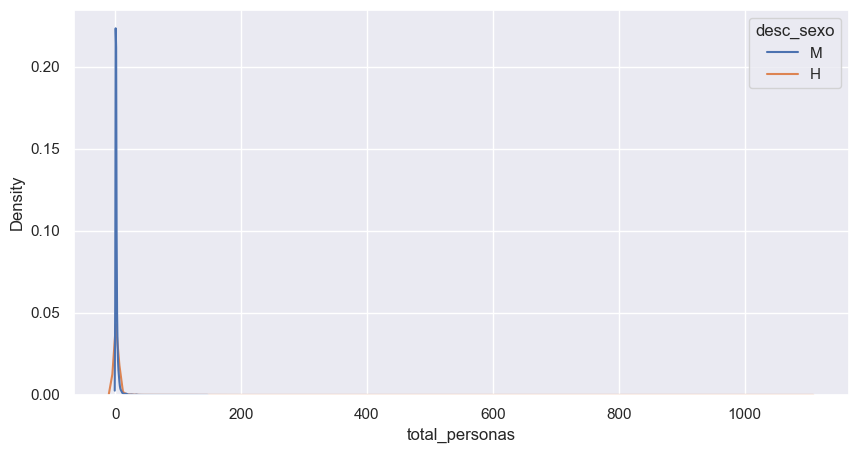

In [1521]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data2023, x="total_personas", hue="desc_sexo")
plt.show()

#aquí pinta la densiedad de población, pero no nos interesa porque cuenta de 1 en 1 por centro de trabajo

In [1069]:
data2023.total_personas.info()

<class 'pandas.core.series.Series'>
Index: 59532 entries, 78331 to 147813
Series name: total_personas
Non-Null Count  Dtype
--------------  -----
59532 non-null  int64
dtypes: int64(1)
memory usage: 2.9 MB


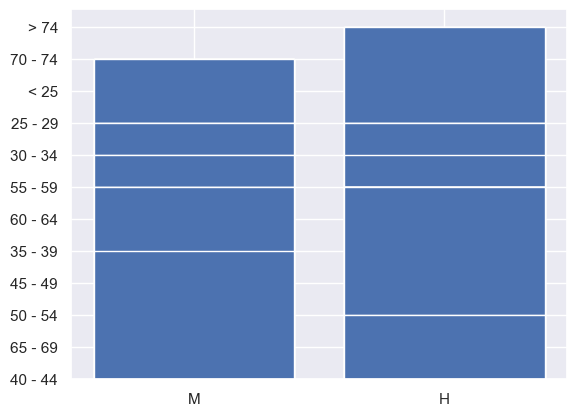

In [1477]:
x2011 = data2023.desc_sexo
x2012 = data2023.rango_edad

plt.bar(x2011, x2012)
plt.show()

#este gráfico no me sirve

In [1131]:
# Calcular el número total_personas para mujeres
data_mujeres = data2023[data2023['desc_sexo'] == 'M']

x = data_mujeres.groupby('desc_sexo')['total_personas'].count()
x

desc_sexo
M    33553
Name: total_personas, dtype: int64

In [1101]:
data2023.groupby('rango_edad').total_personas.count()

rango_edad
25 - 29     1270
30 - 34     2243
35 - 39     3665
40 - 44     5917
45 - 49     9641
50 - 54    10793
55 - 59    11550
60 - 64    10467
65 - 69     3548
70 - 74      136
< 25         296
> 74           6
Name: total_personas, dtype: int64

In [1147]:
pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


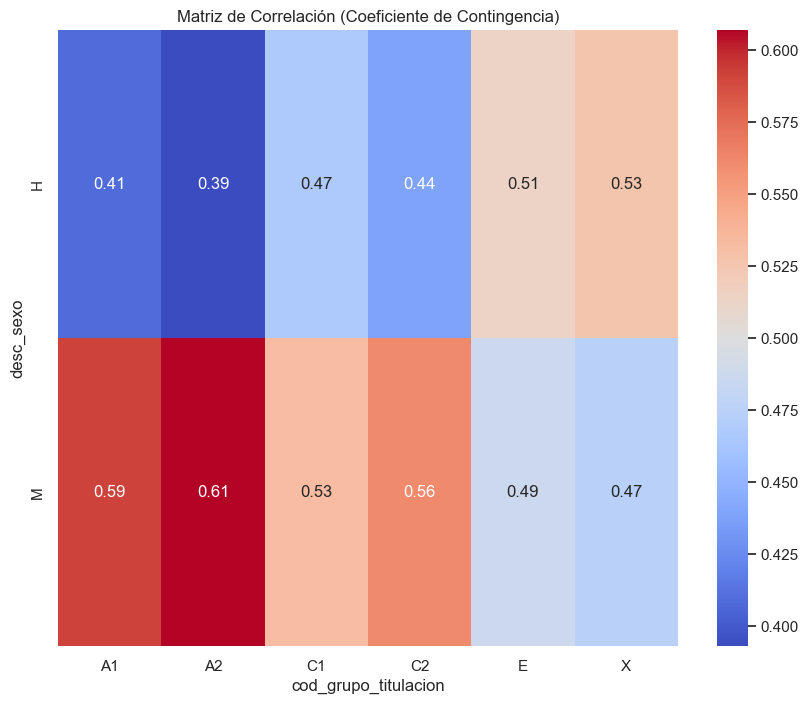

In [1149]:
#Para calcular la matriz de correlación de variables, en este caso categóricas
contingency_tab = pd.crosstab(data2023['desc_sexo'], data2023['cod_grupo_titulacion'])

chi2, p, dof, expected = chi2_contingency(contingency_tab)

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_tab/contingency_tab.sum(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación (Coeficiente de Contingencia)')
plt.show()

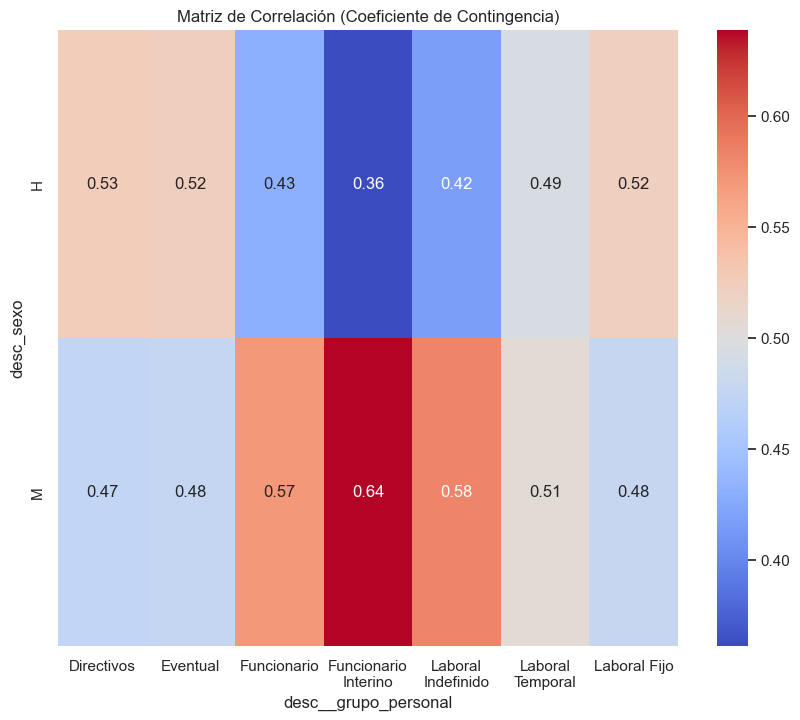

In [1543]:
data2023['desc__grupo_personal'] = data2023['desc__grupo_personal'].str.wrap(15)


contingency_tab = pd.crosstab(data2023['desc_sexo'], data2023['desc__grupo_personal'])

chi2, p, dof, expected = chi2_contingency(contingency_tab)

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_tab/contingency_tab.sum(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación (Coeficiente de Contingencia)')
plt.show()

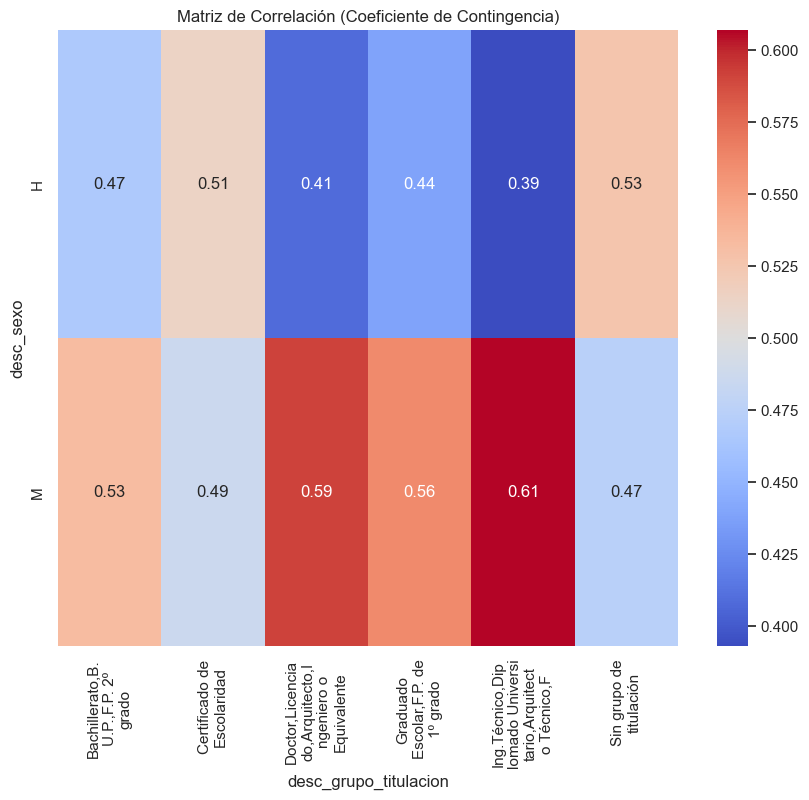

In [1540]:
data2023['desc_grupo_titulacion'] = data2023['desc_grupo_titulacion'].str.wrap(15)


contingency_tab = pd.crosstab(data2023['desc_sexo'], data2023['desc_grupo_titulacion'])

chi2, p, dof, expected = chi2_contingency(contingency_tab)

plt.figure(figsize=(10, 8))
sns.heatmap(contingency_tab/contingency_tab.sum(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación (Coeficiente de Contingencia)')
plt.show()

In [1155]:
#esto lo hice para crear la matriz de correlación por rango de edad, pero no es interesante
data2023.rango_edad.unique()


array(['40 - 44', '65 - 69', '50 - 54', '45 - 49', '35 - 39', '60 - 64',
       '55 - 59', '30 - 34', '25 - 29', '< 25', '70 - 74', '> 74'],
      dtype=object)

In [1164]:
#esto lo hice para crear la matriz de correlación por rango de edad, pero no es interesante
edades = ['40 - 44', '65 - 69', '50 - 54', '45 - 49', '35 - 39', '60 - 64', '55 - 59', '30 - 34', '25 - 29', '< 25', '70 - 74', '> 74']


['< 25', '25 - 29', '30 - 34', '35 - 39', '40 - 44', '45 - 49', '50 - 54', '55 - 59', '60 - 64', '65 - 69', '70 - 74', '> 74']


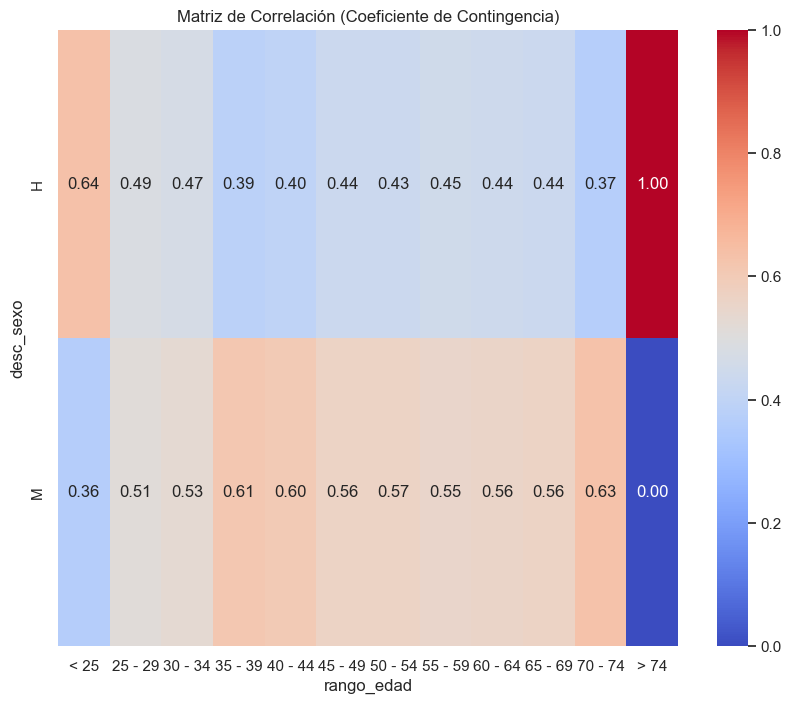

In [1539]:
#esto lo hice para crear la matriz de correlación por rango de edad, pero no es interesante

data2023['rango_edad'] = pd.Categorical(data2023['rango_edad'], categories=edades_ordenadas, ordered=True)

contingency_tab = pd.crosstab(data2023['desc_sexo'], data2023['rango_edad'])

chi2, p, dof, expected = chi2_contingency(contingency_tab)

contingency_tab = contingency_tab[edades_ordenadas]
plt.figure(figsize=(10,8))
sns.heatmap(contingency_tab / contingency_tab.sum(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación (Coeficiente de Contingencia)')
plt.show()


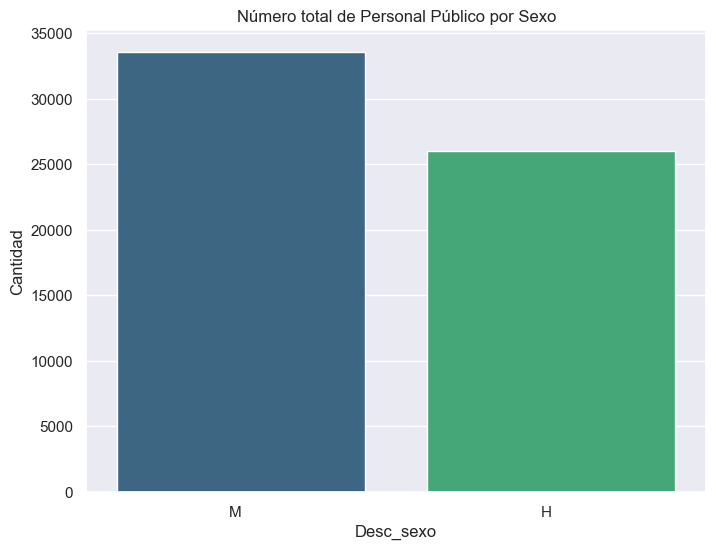

In [1570]:
#gráfico de barras por sexo 
num_pers_sexo = data2023['desc_sexo'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=num_pers_sexo.index, y=num_pers_sexo.values, palette='viridis')
plt.xlabel('Desc_sexo')
plt.ylabel('Cantidad')
plt.title('Número total de Personal Público por Sexo')
plt.xticks(ha='right') 
plt.show()

In [1307]:
data2023.groupby('denominacion_area').describe().total_personas

count       mean  \
denominacion_area                                                       
Agencia Tributaria de Madrid                   ...  1277.0   4.129209   
Agencia de Actividades                         ...   774.0   2.116279   
Agencia para el Empleo                         ...  1121.0   1.821588   
Alcaldía                                       ...  1103.0   1.733454   
Distrito de Arganzuela                         ...  1375.0   1.610909   
Distrito de Barajas                            ...   748.0   1.344920   
Distrito de Carabanchel                        ...  1165.0   1.721030   
Distrito de Centro                             ...   821.0   1.745432   
Distrito de Chamartín                          ...   960.0   1.291667   
Distrito de Chamberí                           ...   568.0   1.401408   
Distrito de Ciudad Lineal                      ...  1366.0   1.612006   
Distrito de Fuencarral-El Pardo                ...  1374.0   1.688501   
Distrito de Hortaleza                          ...  1241.0   1.678485   
Distrito de Latina                             ...  1461.0   2.021218   
Distrito de Moncloa-Aravaca                    ...  1679.0   1.993448   
Distrito de Moratalaz                          ...  1203.0   1.972569   
Distrito de Puente de Vallecas                 ...  1787.0   2.025741   
Distrito de Retiro                             ...  1063.0   1.575729   
Distrito de Salamanca                          ...  1009.0   1.372646   
Distrito de San Blas-Canillejas                ...  1110.0   1.583784   
Distrito de Tetuán                             ...  1101.0   1.514986   
Distrito de Usera                              ...  1248.0   1.678686   
Distrito de Vicálvaro                          ...  1187.0   1.571188   
Distrito de Villa de Vallecas                  ...  1122.0   1.420677   
Distrito de Villaverde                         ...  1452.0   1.862948   
Grupos Políticos Municipales                   ...   343.0   2.078717   
Informática del Ayuntamiento de Madrid         ...  1621.0   1.937693   
Madrid Salud                                   ...  2153.0   3.149094   
Presidencia del Pleno                          ...   432.0   1.604167   
Área de Gobierno de Cultura Turismo y Deporte  ...   874.0   2.450801   
Área de Gobierno de Cultura, Turismo y Deporte ...  1737.0   2.506621   
Área de Gobierno de Desarrollo Urbano          ...  2535.0   1.599211   
Área de Gobierno de Economía Innovación y Emple...   588.0   1.285714   
Área de Gobierno de Economía, Innovación y Empl...   599.0   1.302170   
Área de Gobierno de Familias, Igualdad y Bienes...  3196.0   1.743116   
Área de Gobierno de Hacienda y Personal        ...  4313.0   2.427545   
Área de Gobierno de Medio Ambiente y Movilidad ...  4409.0   3.082105   
Área de Gobierno de Obras y Equipamientos      ...  1856.0   1.490841   
Área de Gobierno de Portavoz, Seguridad y Emerg...  3512.0  15.539579   
Área de Gobierno de Vicealcaldía               ...  2049.0   2.048804   

                                                          std  min  25%  50%  \
denominacion_area                                                              
Agencia Tributaria de Madrid                   ...   7.489265  1.0  1.0  2.0   
Agencia de Actividades                         ...   1.798927  1.0  1.0  1.0   
Agencia para el Empleo                         ...   1.711390  1.0  1.0  1.0   
Alcaldía                                       ...   1.329423  1.0  1.0  1.0   
Distrito de Arganzuela                         ...   1.209748  1.0  1.0  1.0   
Distrito de Barajas                            ...   0.702844  1.0  1.0  1.0   
Distrito de Carabanchel                        ...   1.532112  1.0  1.0  1.0   
Distrito de Centro                             ...   1.483156  1.0  1.0  1.0   
Distrito de Chamartín                          ...   0.662045  1.0  1.0  1.0   
Distrito de Chamberí                           ...   0.983532  1.0  1.0  1.0   
Distrito de Ciudad Lineal 

In [1267]:
#Creo un df con el porcentaje de total de personas por grupo de personal

porcentaje_total_personas = (data2023['desc__grupo_personal'].value_counts() / len(data2023)) * 100
porcentaje_df = pd.DataFrame({'Porcentaje Total Personas': porcentaje_total_personas})
porcentaje_df = porcentaje_df.sort_values(by='Porcentaje Total Personas', ascending=False)
porcentaje = pd.DataFrame(porcentaje_df).applymap(lambda x: f"{x:.2f}%")
porcentaje

Porcentaje Total Personas
desc__grupo_personal                          
Funcionario                             50.77%
Funcionario Interino                    19.72%
Laboral Temporal                        14.20%
Laboral Fijo                             9.79%
Laboral Indefinido                       3.31%
Eventual                                 1.18%
Directivos                               1.02%

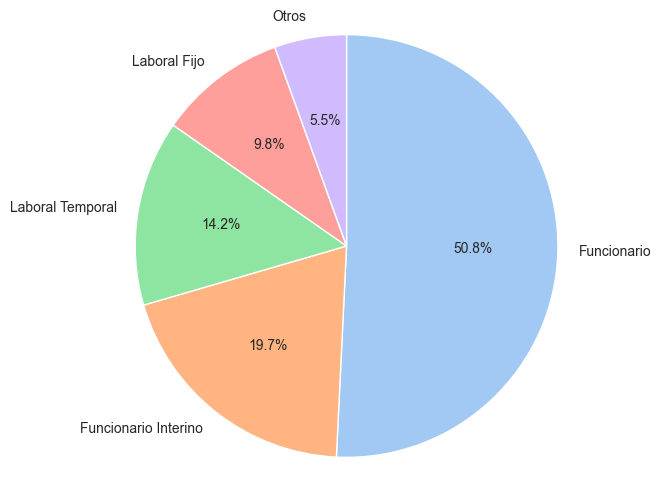

In [1308]:
#Aquí quiero hacer un gráfico circular con los diferentes grupos de personal y su porcentaje

grupo_personal_counts = data2023['desc__grupo_personal'].value_counts()
porcentajes = grupo_personal_counts / grupo_personal_counts.sum()
categorias_grandes = porcentajes[porcentajes >= 0.05].index
otros_porcentaje = porcentajes[porcentajes < 0.05].sum()

data2023['desc_grupo_personal_filtrado'] = data2023['desc__grupo_personal'].apply(lambda x: x if x in categorias_grandes else 'Otros')

grupo_personal_counts_filtrado = data2023['desc_grupo_personal_filtrado'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(grupo_personal_counts_filtrado, labels=grupo_personal_counts_filtrado.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10}, colors=sns.color_palette('pastel'), counterclock=False)
plt.axis('equal')
plt.show()

In [1287]:
import plotly.express as px

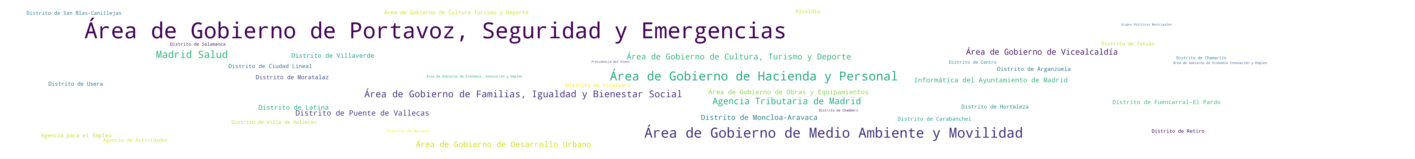

In [1304]:
#gráfico wordcloud con los corganismos 
wordcloud_df = data2023[['denominacion_area', 'total_personas']]

wordcloud_df['total_personas'] = pd.to_numeric(wordcloud_df['total_personas'], errors='coerce')
wordcloud_df.dropna(subset=['total_personas'], inplace=True)

denominacion_area_counts = wordcloud_df.groupby('denominacion_area')['total_personas'].sum().reset_index()
wordcloud_data = dict(zip(denominacion_area_counts['denominacion_area'], denominacion_area_counts['total_personas']))

# Crear el objeto WordCloud
wordcloud = WordCloud(width=10000, height=1000, background_color='white').generate_from_frequencies(wordcloud_data)

# Gráfico
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [1281]:
# Calcular el porcentaje de total_personas con respecto a desc__grupo_personal y desc_sexo
porcentaje_total_personas = (data2023.groupby(['desc_grupo_personal_filtrado', 'desc_sexo']).size() / len(data2023)) * 100


porcentaje_df = pd.DataFrame({'Porcentaje Total Personas': porcentaje_total_personas})
porcentaje_df = porcentaje_df.reset_index()
porcentaje_df = porcentaje_df.sort_values(by='Porcentaje Total Personas', ascending=False)
porcentaje_df['Porcentaje Total Personas'] = porcentaje_df['Porcentaje Total Personas'].apply(lambda x: f"{x:.2f}%")

porc_sex = pd.DataFrame(porcentaje_df)
porc_sex


desc_grupo_personal_filtrado desc_sexo Porcentaje Total Personas
1                  Funcionario         M                    28.92%
0                  Funcionario         H                    21.85%
3         Funcionario Interino         M                    12.60%
7             Laboral Temporal         M                     7.18%
2         Funcionario Interino         H                     7.13%
6             Laboral Temporal         H                     7.02%
4                 Laboral Fijo         H                     5.11%
5                 Laboral Fijo         M                     4.68%
9                        Otros         M                     2.98%
8                        Otros         H                     2.54%

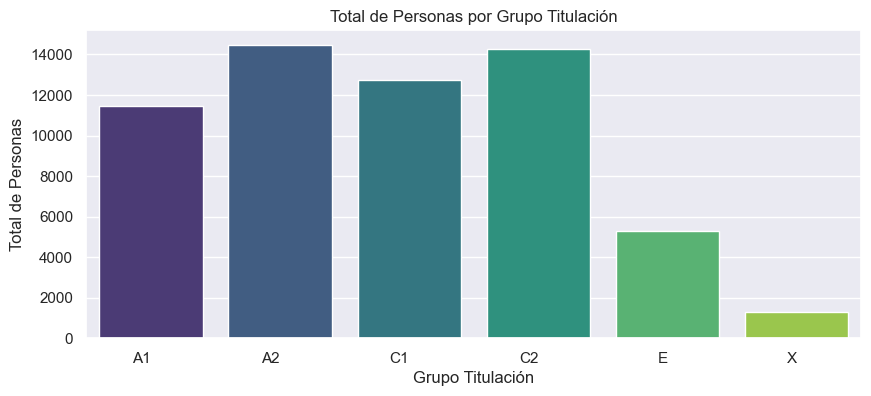

In [1326]:
#Creo el gráfico de barras y compruebo con la tabla si los valores son correctos
grupo_titulacion_counts = data2023.groupby('cod_grupo_titulacion')['total_personas'].count().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=grupo_titulacion_counts, x='cod_grupo_titulacion', y='total_personas', palette='viridis')
plt.xlabel('Grupo Titulación')
plt.ylabel('Total de Personas')
plt.title('Total de Personas por Grupo Titulación')
plt.xticks(ha='right')
plt.show()

In [1317]:
data2023.groupby('cod_grupo_titulacion').describe().total_personas

count      mean        std  min  25%  50%  75%     max
cod_grupo_titulacion                                                          
A1                    11461.0  1.630661   1.746839  1.0  1.0  1.0  2.0    26.0
A2                    14475.0  1.849396   2.162778  1.0  1.0  1.0  2.0    37.0
C1                    12749.0  5.556044  40.366546  1.0  1.0  1.0  2.0  1098.0
C2                    14261.0  2.508099   6.621379  1.0  1.0  1.0  2.0   228.0
E                      5270.0  2.634725   3.141439  1.0  1.0  1.0  3.0    36.0
X                      1316.0  1.398176   1.214411  1.0  1.0  1.0  1.0    11.0

In [1389]:
#creo un df con el código de titulación, descripción del grupo de titulacion 
porcentaje_total_personas = data2023.groupby(['cod_grupo_titulacion', 'desc_grupo_titulacion'])['total_personas'].count() / data2023['total_personas'].count() * 100
porcentaje_df = pd.DataFrame(porcentaje_total_personas).reset_index()
porcentaje_df = porcentaje_df.rename(columns={'total_personas': 'Porcentaje Total Personas'})
porcentaje_df['Porcentaje Total Personas'] = porcentaje_df['Porcentaje Total Personas'].map('{:.2f}%'.format)
porcentaje_df

cod_grupo_titulacion                              desc_grupo_titulacion  \
0                   A1  Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
1                   A2  Ing.Técnico,Diplomado Universitario,Arquitecto...   
2                   C1                  Bachillerato,B.U.P.,F.P. 2º grado   
3                   C2                  Graduado Escolar,F.P. de 1º grado   
4                    E                         Certificado de Escolaridad   
5                    X                            Sin grupo de titulación   

  Porcentaje Total Personas  
0                    19.25%  
1                    24.31%  
2                    21.42%  
3                    23.96%  
4                     8.85%  
5                     2.21%

In [1393]:
#creo un df con el código de titulación, descripción del grupo de titulacion e incluyo la columna sexo
porcentaje_total_personas = data2023.groupby(['cod_grupo_titulacion', 'desc_grupo_titulacion', 'desc_sexo'])['total_personas'].count() / data2023['total_personas'].count() * 100
porcentaje_df = pd.DataFrame(porcentaje_total_personas).reset_index()
porcentaje_df = porcentaje_df.rename(columns={'total_personas': 'Porcentaje Total Personas'})
porcentaje_df['Porcentaje Total Personas'] = porcentaje_df['Porcentaje Total Personas'].map('{:.2f}%'.format)
porcentaje_df

cod_grupo_titulacion                              desc_grupo_titulacion  \
0                    A1  Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
1                    A1  Doctor,Licenciado,Arquitecto,Ingeniero o Equiv...   
2                    A2  Ing.Técnico,Diplomado Universitario,Arquitecto...   
3                    A2  Ing.Técnico,Diplomado Universitario,Arquitecto...   
4                    C1                  Bachillerato,B.U.P.,F.P. 2º grado   
5                    C1                  Bachillerato,B.U.P.,F.P. 2º grado   
6                    C2                  Graduado Escolar,F.P. de 1º grado   
7                    C2                  Graduado Escolar,F.P. de 1º grado   
8                     E                         Certificado de Escolaridad   
9                     E                         Certificado de Escolaridad   
10                    X                            Sin grupo de titulación   
11                    X                            Sin grupo de titulación   

   desc_sexo Porcentaje Total Personas  
0          H                     7.87%  
1          M                    11.38%  
2          H                     9.56%  
3          M                    14.76%  
4          H                    10.00%  
5          M                    11.42%  
6          H                    10.50%  
7          M                    13.45%  
8          H                     4.55%  
9          M                     4.31%  
10         H                     1.16%  
11         M                     1.05%

In [1371]:
#calculo el porcentaje de personas por sexo de cada grupo de titulación
porcentaje_total_personas = (data2023.groupby(['cod_grupo_titulacion', 'desc_sexo'])['total_personas'].count() / data2023.groupby('cod_grupo_titulacion')['total_personas'].count() * 100).reset_index()

porcentaje_df = porcentaje_total_personas.pivot_table(index='cod_grupo_titulacion', columns='desc_sexo', values='total_personas', fill_value=0)
porcentaje_df['Total'] = porcentaje_df['M'] + porcentaje_df['H']
porcentaje_df['M'] = porcentaje_df['M'].map('{:.2f}%'.format)
porcentaje_df['H'] = porcentaje_df['H'].map('{:.2f}%'.format)
porcentaje_df['Total'] = porcentaje_df['Total'].map('{:.2f}%'.format)

ddff = pd.DataFrame(porcentaje_df)
ddff

desc_sexo                  H       M    Total
cod_grupo_titulacion                         
A1                    40.87%  59.13%  100.00%
A2                    39.31%  60.69%  100.00%
C1                    46.69%  53.31%  100.00%
C2                    43.85%  56.15%  100.00%
E                     51.35%  48.65%  100.00%
X                     52.66%  47.34%  100.00%

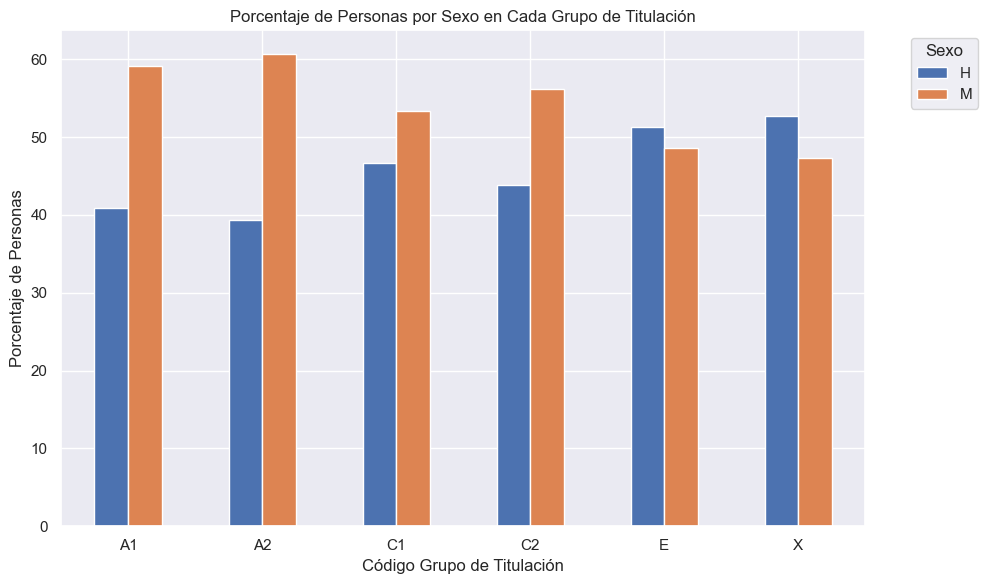

In [1372]:
#grafico el porcentaje de personas por sexo de cada grupo de titulación
porcentaje_total_personas = (data2023.groupby(['cod_grupo_titulacion', 'desc_sexo'])['total_personas'].count() / data2023.groupby('cod_grupo_titulacion')['total_personas'].count() * 100).reset_index()

porcentaje_df = porcentaje_total_personas.pivot_table(index='cod_grupo_titulacion', columns='desc_sexo', values='total_personas', fill_value=0)
porcentaje_df['M'] = pd.to_numeric(porcentaje_df['M'])
porcentaje_df['H'] = pd.to_numeric(porcentaje_df['H'])

ax = porcentaje_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Código Grupo de Titulación')
plt.ylabel('Porcentaje de Personas')
plt.title('Porcentaje de Personas por Sexo en Cada Grupo de Titulación')
plt.xticks(rotation=0)
plt.legend(title='Sexo', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()

plt.show()

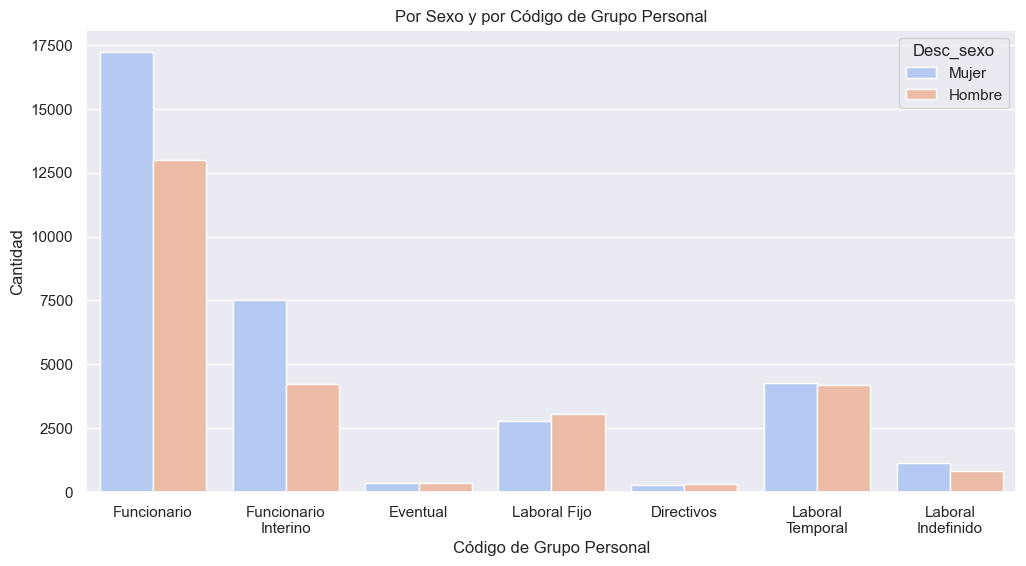

In [1557]:
# Grafico por sexo y por código de Grupo Personal
plt.figure(figsize=(12, 6))
sns.countplot(x='desc__grupo_personal', hue='desc_sexo', data=data2023, palette='coolwarm')
plt.xlabel('Código de Grupo Personal')
plt.ylabel('Cantidad')
plt.title('Por Sexo y por Código de Grupo Personal')
plt.legend(title='Desc_sexo', loc='upper right', labels=['Mujer', 'Hombre'])
plt.show()

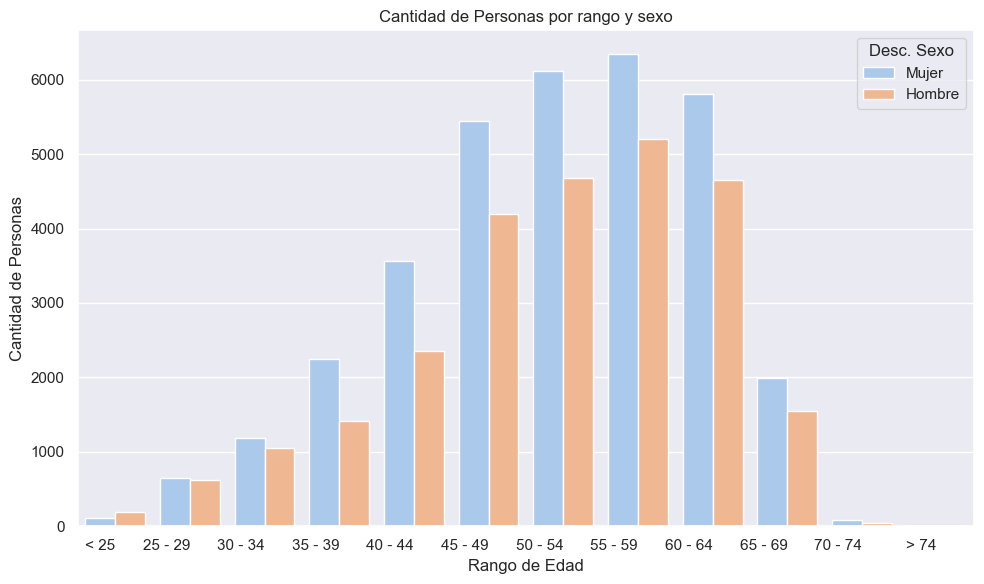

In [1478]:
# Grafico la cantidad de personas por rango y sexo
plt.figure(figsize=(10, 6))
sns.countplot(data=data2023, x='rango_edad', hue='desc_sexo', palette='pastel')
plt.title('Cantidad de Personas por rango y sexo')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Desc. Sexo', loc='upper right', labels=['Mujer', 'Hombre'])
plt.xticks(ha='right')
plt.tight_layout()
plt.show()

In [1205]:
#reviso cuántos hombres y mujeres hay en la base de datos 
grouped = data2023.groupby('desc_sexo')['cod_grupo_personal']
description_by_sex = grouped.describe().reset_index()

print(description_by_sex)

  desc_sexo  count unique top   freq
0         H  25979      7   F  13005
1         M  33553      7   F  17218


In [1505]:
#calculo la distribucion por sexo del grupo de personal
distribucion_grpo_sexo = data2023.groupby(by ='cod_grupo_personal')['desc_sexo'].value_counts().unstack(fill_value=0)
distribucion_grpo_sexo['Total'] = distribucion_grpo_sexo.sum(axis=1)
distribucion = pd.DataFrame(distribucion_grpo_sexo)
distribucion

desc_sexo               H      M  Total
cod_grupo_personal                     
D                     824   1149   1973
E                     369    336    705
F                   13005  17218  30223
I                    4242   7499  11741
L                    3042   2789   5831
R                     318    287    605
T                    4179   4275   8454

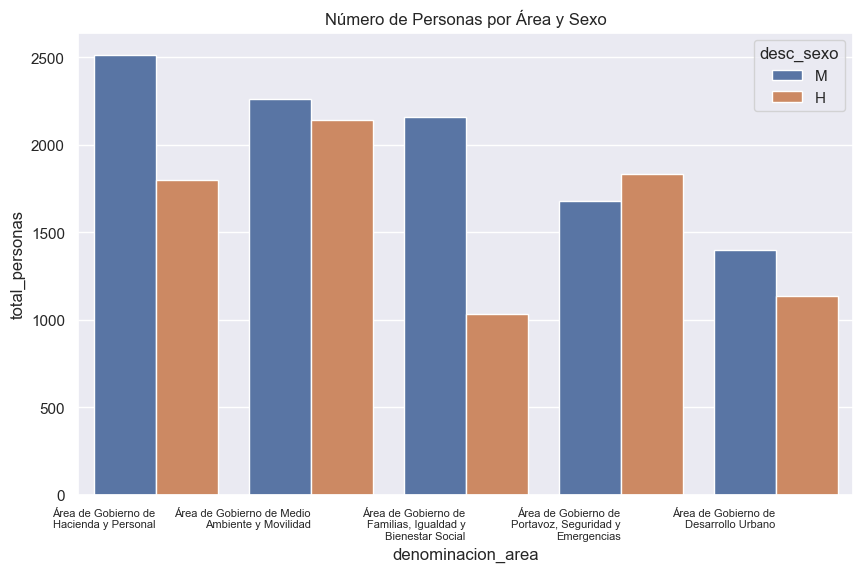

In [1552]:
#grarfico las 5 áreas que más personsa tienen por sexo
data2023['denominacion_area'] = data2023['denominacion_area'].str.wrap(25)


df1 = data2023.groupby(['denominacion_area', 'desc_sexo'])['total_personas'].count().reset_index()
df1 = df1.sort_values(by=['total_personas', 'denominacion_area'], ascending=[False, True])

top_organismos = df1['denominacion_area'].unique()[:5]
df1_top_5 = df1[df1['denominacion_area'].isin(top_organismos)]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='denominacion_area', y='total_personas', hue='desc_sexo', data=df1_top_5)
ax.set_title('Número de Personas por Área y Sexo')
plt.xticks(ha='right', fontsize=8) 
plt.show()

In [1439]:
#hago una tabla para comprobar el gráfico de arriba
df1 = data2023.groupby(['denominacion_area', 'desc_sexo'])['total_personas'].count().reset_index()
df1 = df1.sort_values(by=['total_personas', 'denominacion_area'], ascending=[False, True])

top_organismos = df1['denominacion_area'].unique()[:5]

df1_top_5 = df1[df1['denominacion_area'].isin(top_organismos)]
df1_top_5

denominacion_area desc_sexo  \
71  Área de Gobierno de Hacienda y Personal       ...         M   
73  Área de Gobierno de Medio Ambiente y Movilidad...         M   
69  Área de Gobierno de Familias, Igualdad y Biene...         M   
72  Área de Gobierno de Medio Ambiente y Movilidad...         H   
76  Área de Gobierno de Portavoz, Seguridad y Emer...         H   
70  Área de Gobierno de Hacienda y Personal       ...         H   
77  Área de Gobierno de Portavoz, Seguridad y Emer...         M   
63  Área de Gobierno de Desarrollo Urbano         ...         M   
62  Área de Gobierno de Desarrollo Urbano         ...         H   
68  Área de Gobierno de Familias, Igualdad y Biene...         H   

    total_personas  
71            2515  
73            2264  
69            2162  
72            2145  
76            1834  
70            1798  
77            1678  
63            1401  
62            1134  
68            1034

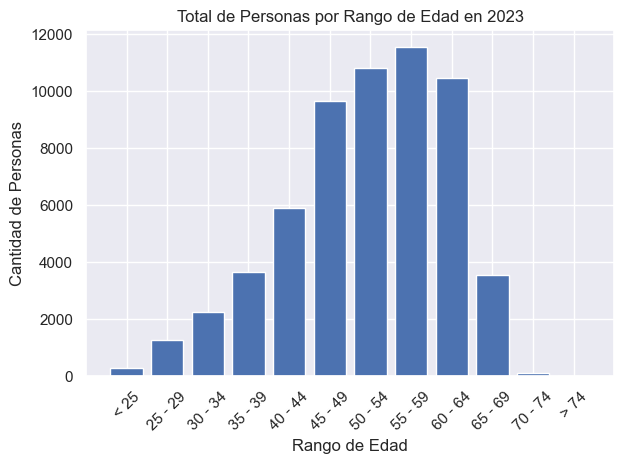

In [1468]:
#grafico por rango de edad en funcion del total de personas
data_grouped = data2023.groupby('rango_edad')['total_personas'].describe()['count']

plt.bar(data_grouped.index, data_grouped.values)
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Personas')
plt.title('Total de Personas por Rango de Edad en 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()